# Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ETF_Universe.csv")
df2 = pd.read_csv("Macro_Factors.csv")
df3 = pd.read_csv("Mystery_Allocation_V2.csv")
df4 = pd.read_csv("Mystery_Allocation.csv")


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
num_nans = df2.isna().sum().sum()

# print the number of NaN values if it is greater than 1, otherwise print "no NaN values found"
if num_nans > 1:
    print(f'The number of NaN values in the dataframe is {num_nans}.')
else:
    print('No NaN values found.')

No NaN values found.


# Centered Reduced Method

In [6]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x - x.mean()) / x.std(), axis=0)

# exclude "Unnamed: 0" column
df_mean = mean_norm(df.drop("Unnamed: 0", axis=1))

# concatenate "Unnamed: 0" column with the normalized dataframe
final_df = pd.concat([df["Unnamed: 0"], df_mean], axis=1)

# print the final dataframe
final_df



Unnamed: 0     ETF_1     ETF_2     ETF_3     ETF_4     ETF_5     ETF_6  \
0    2021-01-04  0.806268 -0.798585 -1.565083  2.198983 -1.575901  0.671219   
1    2021-01-05  0.844986 -0.792269 -1.636427  2.397990 -1.565964  0.698690   
2    2021-01-06  0.721764 -0.834780 -1.721161  2.935433 -1.648906  0.654340   
3    2021-01-07  0.790879 -0.897614 -1.592062  3.663562 -1.277290  0.775154   
4    2021-01-08  0.911967 -0.698989 -1.635228  3.780792 -0.768869  0.989354   
..          ...       ...       ...       ...       ...       ...       ...   
578  2023-03-23 -0.658148  0.229278  0.525088 -0.925501 -0.006916 -0.671115   
579  2023-03-24 -0.638680  0.034378  0.299364 -0.993481 -0.008276 -0.658835   
580  2023-03-27 -0.653267  0.054945  0.514396 -0.977719  0.013898 -0.703946   
581  2023-03-28 -0.694486 -0.057283  0.551368 -0.977343  0.038372 -0.639044   
582  2023-03-29 -0.637620  0.163448  0.568554 -0.851626  0.315541 -0.649425   

        ETF_7     ETF_8     ETF_9  ...    ETF_92    ETF_93    ETF_94  \
0   -0.711957 -0.877861  1.600338  ...  1.052493 -0.139305 -2.164978   
1   -0.737992 -0.754438  1.566506  ...  1.046843 -0.007533 -2.033632   
2   -0.531029 -0.765874  1.565727  ...  1.036209 -0.130317 -1.886296   
3   -0.273675 -0.549655  1.528583  ...  1.034879  0.049969 -1.747013   
4   -0.236761 -0.481594  1.213319  ...  1.037538  0.269759 -1.693837   
..        ...       ...       ...  ...       ...       ...       ...   
578 -1.830518  0.350392 -0.015791  ... -1.206979 -0.579647 -0.959385   
579 -1.872431  0.228348  0.039794  ... -1.101632 -0.730563 -1.038340   
580 -1.871191  0.156596  0.036288  ... -1.172085 -0.749078 -0.877260   
581 -1.848435  0.075788  0.175770  ... -1.245196 -0.538874 -0.779061   
582 -1.754771  0.284050  0.156679  ... -1.252840 -0.484558 -0.590713   

       ETF_95    ETF_96    ETF_97    ETF_98    ETF_99   ETF_100   ETF_101  
0   -1.483000 -1.678040 -2.891087 -1.430349 -0.543552 -1.503212 -1.119506  
1   -1.392053 -1.738865 -2.942777 -1.484669 -0.472540 -1.483256 -1.101864  
2   -1.331644 -1.506292 -2.906424 -1.298064 -0.589723 -1.256923 -1.031362  
3   -1.130847 -1.464548 -2.424897 -1.232241 -0.382629 -1.215009 -0.978277  
4   -1.058353 -1.381297 -1.953179 -1.135105 -0.274134 -1.111973 -0.938632  
..        ...       ...       ...       ...       ...       ...       ...  
578 -0.711987  1.430880  0.646975  0.794848 -0.417479  2.061962  0.311674  
579 -0.643430  1.145868  0.607702  0.508550 -0.392423  2.045745  0.104754  
580 -0.618764  1.277008  0.699301  0.655533 -0.454695  2.139247  0.142796  
581 -0.640347  1.290861  0.805312  0.663202 -0.496114  2.321953  0.062928  
582 -0.449880  1.534179  1.232367  0.890706 -0.340082  2.602085  0.361423  

[583 rows x 102 columns]

In [7]:
# exclude "Unnamed: 0" column and compute mean_norm function
df_mean2 = mean_norm(df2.drop("Unnamed: 0", axis=1))

# concatenate "Unnamed: 0" column with the normalized dataframe
final_df2 = pd.concat([df2["Unnamed: 0"], df_mean2], axis=1)

# print the final dataframe
final_df2

Unnamed: 0  US S&P 500  EU Stoxx 600  Japan Nikkei 225  MSCI EM USD  \
0     2006-01-02   -0.934944     -0.968578         -0.500852    -1.845655   
1     2006-01-03   -0.919935     -0.955404         -0.500852    -1.796643   
2     2006-01-04   -0.916393     -0.933331         -0.473252    -1.748743   
3     2006-01-05   -0.916373     -0.941148         -0.466208    -1.738522   
4     2006-01-06   -0.907447     -0.926498         -0.465895    -1.715129   
...          ...         ...           ...               ...          ...   
4494  2023-03-24    1.856053      1.846917          1.832586     0.766430   
4495  2023-03-27    1.862152      1.900205          1.846355     0.724871   
4496  2023-03-28    1.856378      1.897305          1.852568     0.759997   
4497  2023-03-29    1.909130      1.963668          1.907269     0.810336   
4498  2023-03-30    1.930958      2.018873          1.930869     0.841377   

         US HY     EU HY  BCOM Energy  BCOM Industrial Metals  BCOM Gold  \
0    -1.452683 -1.410882     3.372938               -0.357512  -2.172216   
1    -1.449303 -1.407647     3.334255               -0.336545  -2.117013   
2    -1.446447 -1.400315     3.270758               -0.281801  -2.104432   
3    -1.443571 -1.395761     3.129508               -0.297461  -2.136092   
4    -1.441361 -1.393496     3.201499               -0.276582  -2.081701   
...        ...       ...          ...                     ...        ...   
4494  1.233144  1.044276    -0.769196                0.247486   1.377968   
4495  1.236993  1.050009    -0.762609                0.276124   1.292629   
4496  1.229094  1.055948    -0.762736                0.302947   1.346037   
4497  1.257672  1.065746    -0.764476                0.299050   1.329365   
4498  1.282754  1.083713    -0.763985                0.278909   1.366664   

      Dollar Index  US 10Y Bond  Germany Bund 10Y  
0         0.513316    -1.800407         -1.192393  
1         0.385175    -1.791137         -1.190676  
2         0.276709    -1.786487         -1.180357  
3         0.307825    -1.786487         -1.179397  
4         0.248657    -1.793468         -1.177090  
...            ...          ...               ...  
4494      1.950422     0.267736          0.371882  
4495      1.937641     0.202746          0.309365  
4496      1.889875     0.183109          0.283445  
4497      1.910249     0.176886          0.281751  
4498      1.845863     0.179550          0.262469  

[4499 rows x 13 columns]

In [8]:
final_df2['Unnamed: 0'] = pd.to_datetime(final_df2['Unnamed: 0'])

# filter rows with date >= '2021-01-04'
new_dff = final_df2[(final_df2['Unnamed: 0'] >= '2021-01-04') & (final_df2['Unnamed: 0'] < '2023-03-30')]

# print the new dataframe
new_dff


Unnamed: 0  US S&P 500  EU Stoxx 600  Japan Nikkei 225  MSCI EM USD  \
3915 2021-01-04    1.520960      1.175758          1.655341     2.143641   
3916 2021-01-05    1.545109      1.167598          1.640944     2.220397   
3917 2021-01-06    1.564526      1.226981          1.626124     2.197473   
3918 2021-01-07    1.615722      1.249594          1.688789     2.232098   
3919 2021-01-08    1.635059      1.278696          1.782444     2.386354   
...         ...         ...           ...               ...          ...   
4493 2023-03-23    1.835265      1.914658          1.837744     0.794203   
4494 2023-03-24    1.856053      1.846917          1.832586     0.766430   
4495 2023-03-27    1.862152      1.900205          1.846355     0.724871   
4496 2023-03-28    1.856378      1.897305          1.852568     0.759997   
4497 2023-03-29    1.909130      1.963668          1.907269     0.810336   

         US HY     EU HY  BCOM Energy  BCOM Industrial Metals  BCOM Gold  \
3915  1.492148  1.291708    -0.895846               -0.331001   1.519873   
3916  1.493104  1.293252    -0.885990               -0.278306   1.543106   
3917  1.498317  1.296417    -0.883813               -0.260548   1.406684   
3918  1.502170  1.300860    -0.883096               -0.225424   1.421578   
3919  1.504756  1.305401    -0.880063               -0.272860   1.188645   
...        ...       ...          ...                     ...        ...   
4493  1.253446  1.052787    -0.768741                0.237990   1.410747   
4494  1.233144  1.044276    -0.769196                0.247486   1.377968   
4495  1.236993  1.050009    -0.762609                0.276124   1.292629   
4496  1.229094  1.055948    -0.762736                0.302947   1.346037   
4497  1.257672  1.065746    -0.764476                0.299050   1.329365   

      Dollar Index  US 10Y Bond  Germany Bund 10Y  
3915      0.322589     1.537508          1.673675  
3916      0.349856     1.517686          1.667467  
3917      0.315456     1.472672          1.633369  
3918      0.353102     1.455217          1.642010  
3919      0.351244     1.434543          1.641655  
...            ...          ...               ...  
4493      1.846992     0.260523          0.300279  
4494      1.950422     0.267736          0.371882  
4495      1.937641     0.202746          0.309365  
4496      1.889875     0.183109          0.283445  
4497      1.910249     0.176886          0.281751  

[583 rows x 13 columns]

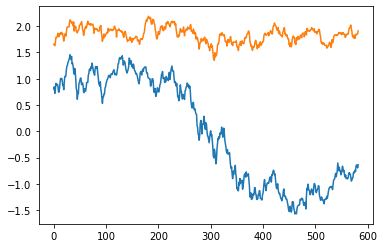

In [9]:
import matplotlib.pyplot as plt

plt.plot(final_df['ETF_1'].reset_index(drop=True ))
plt.plot(new_dff['Japan Nikkei 225'].reset_index(drop=True))
plt.show()

# MinMaxSclater and Correlation method

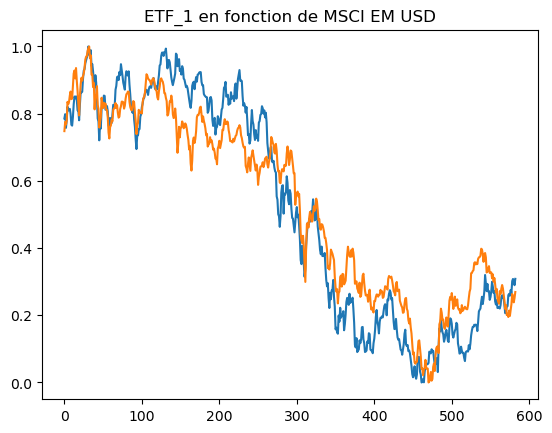

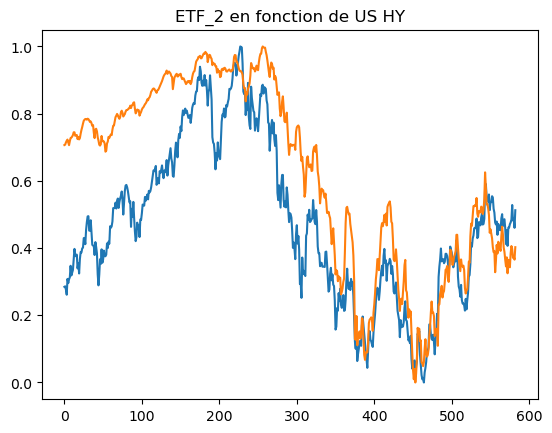

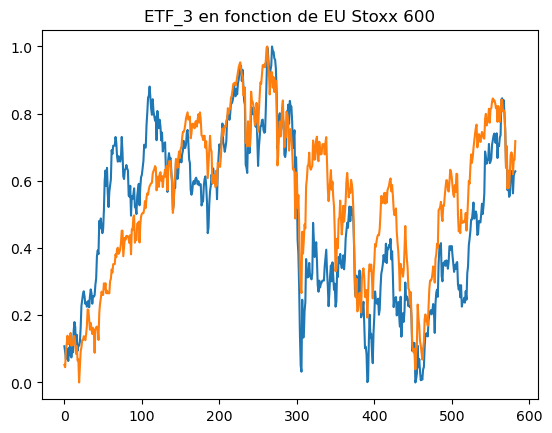

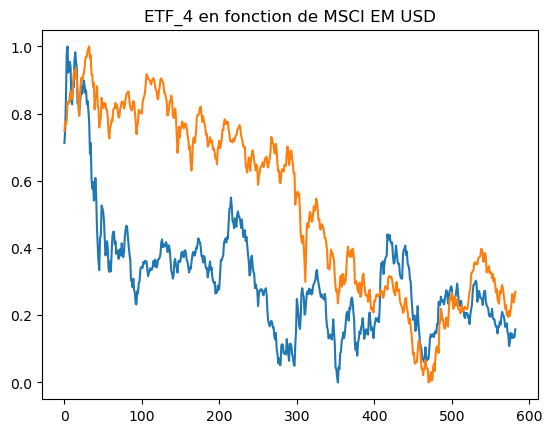

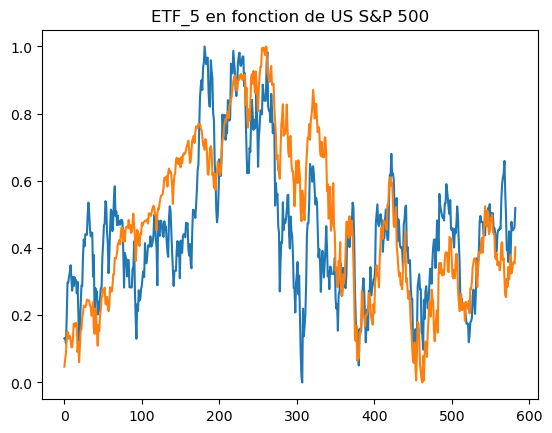

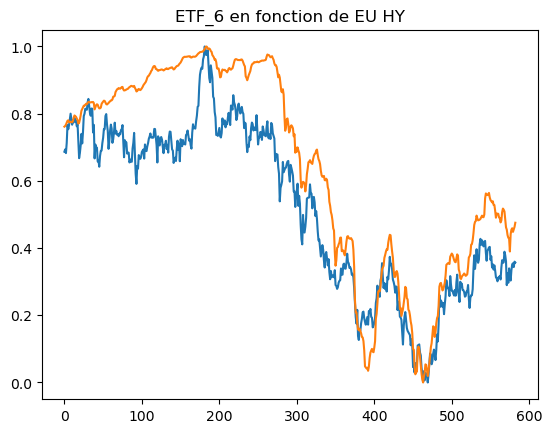

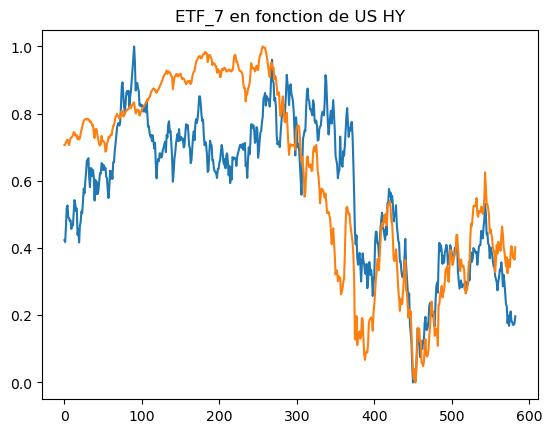

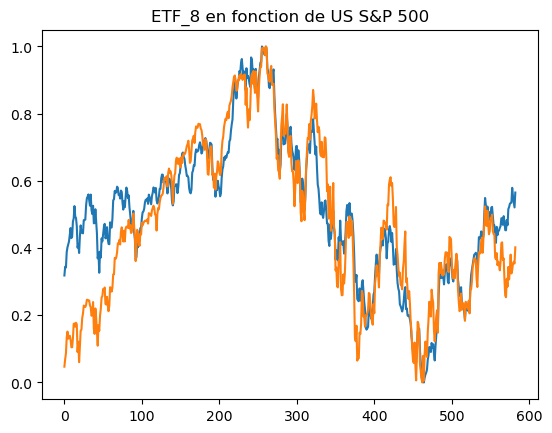

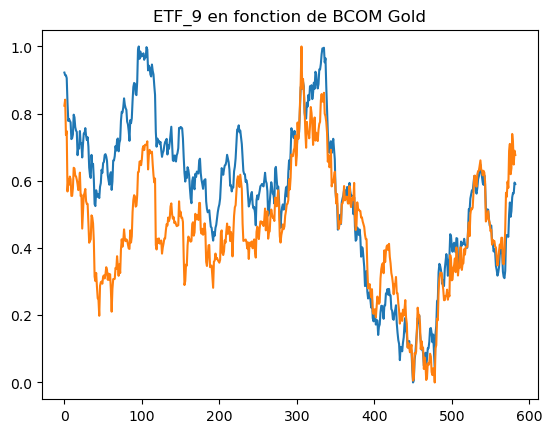

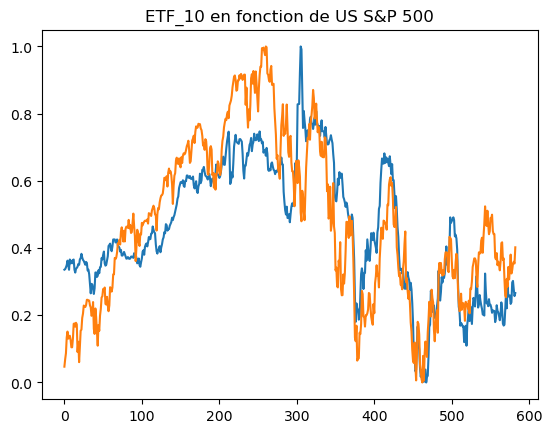

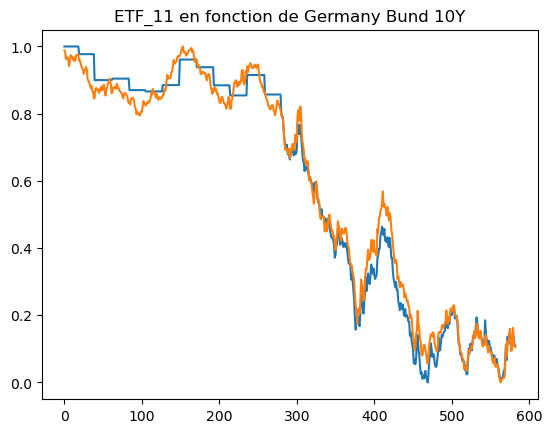

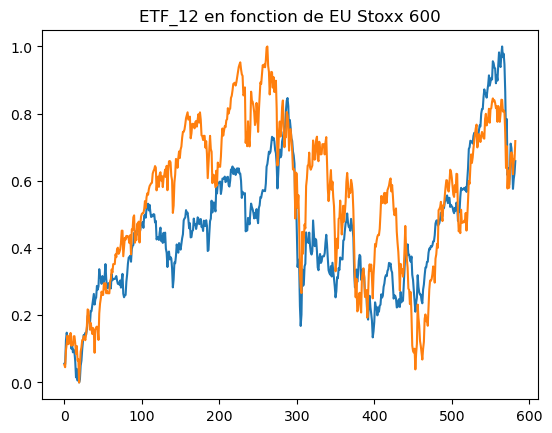

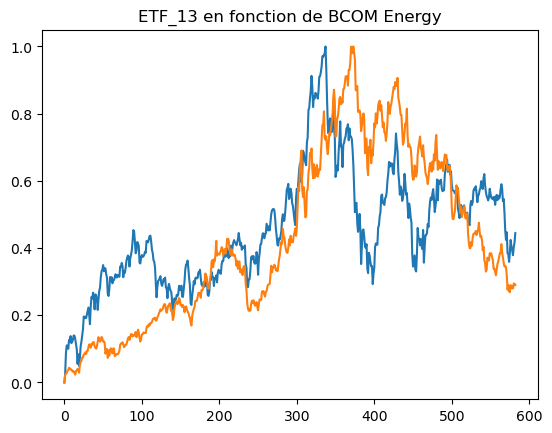

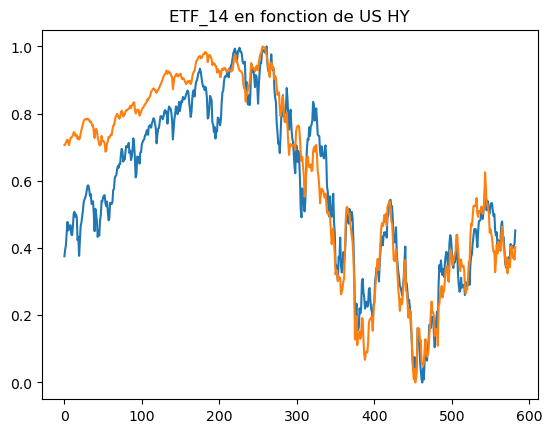

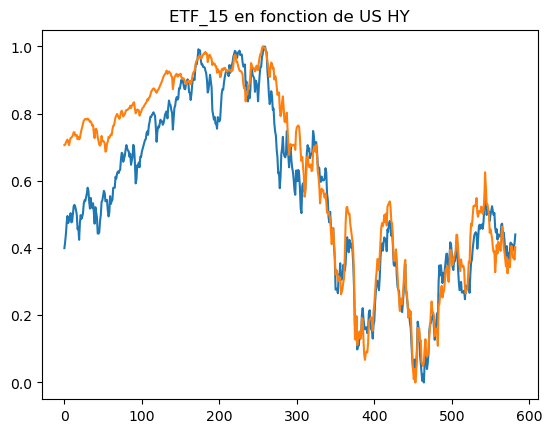

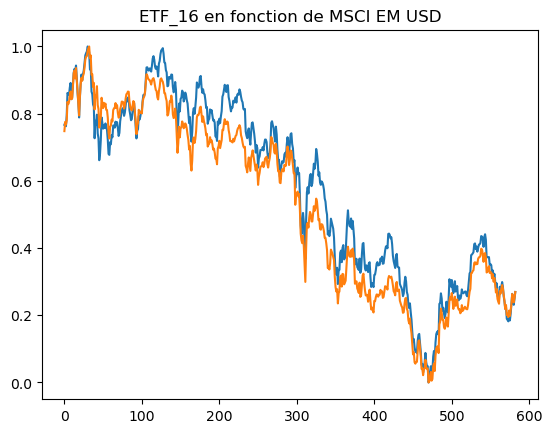

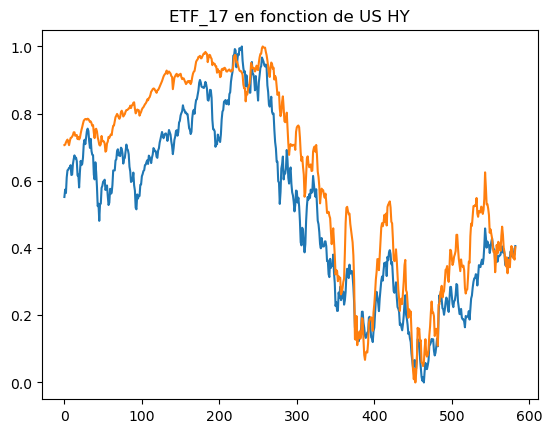

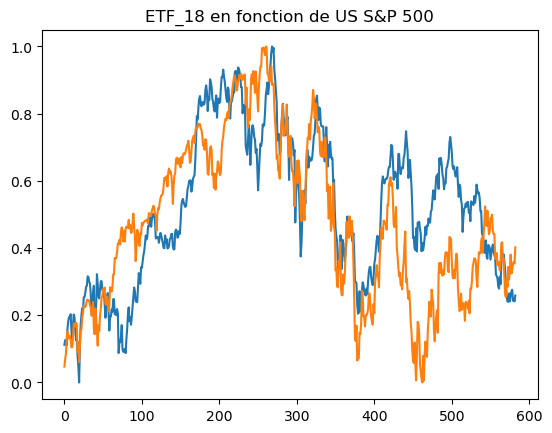

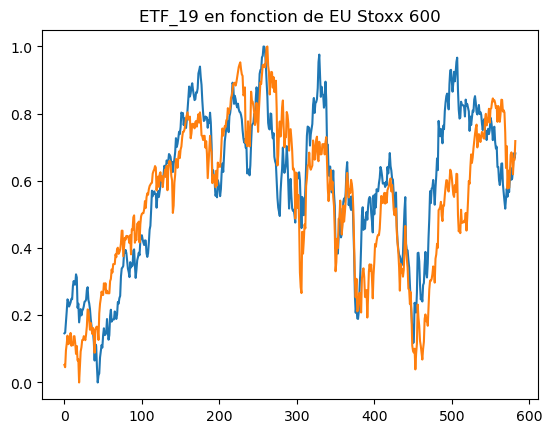

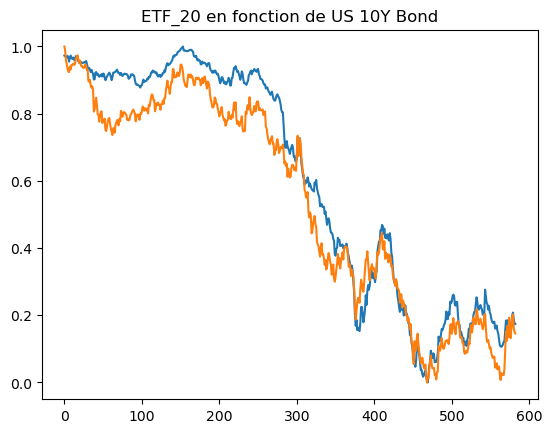

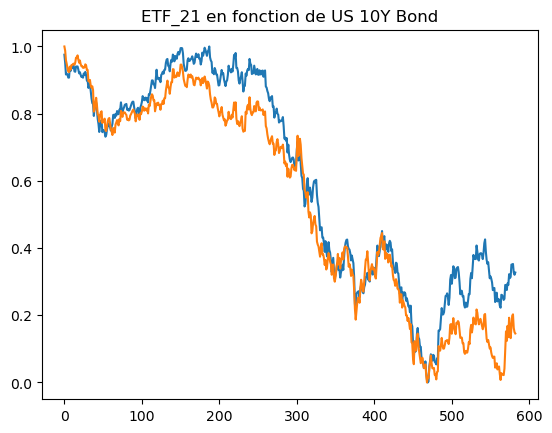

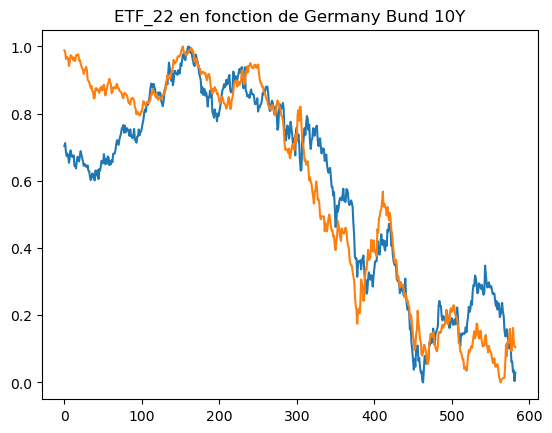

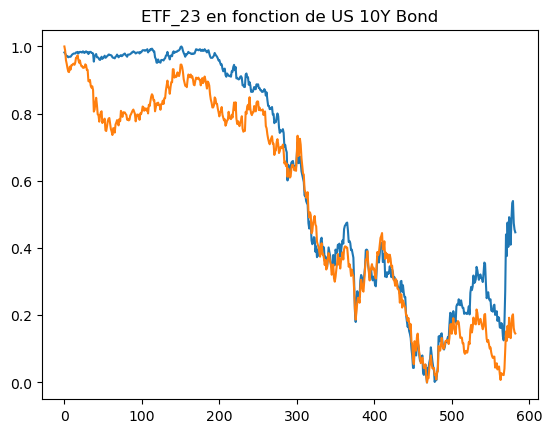

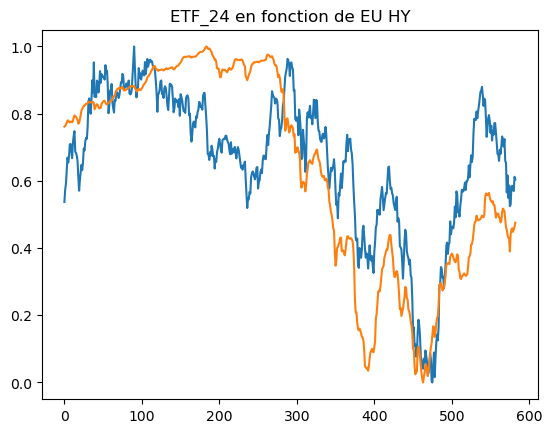

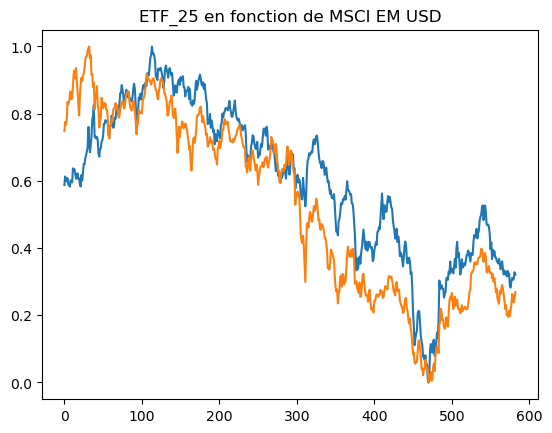

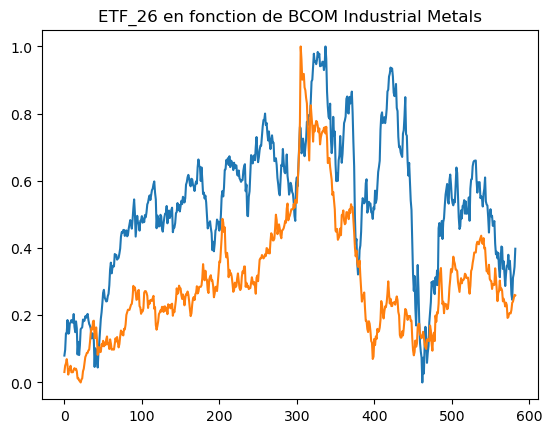

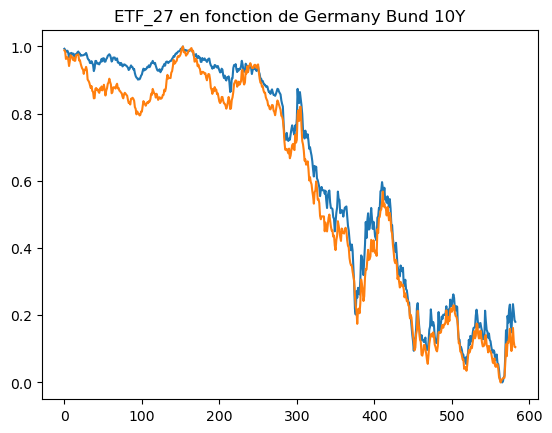

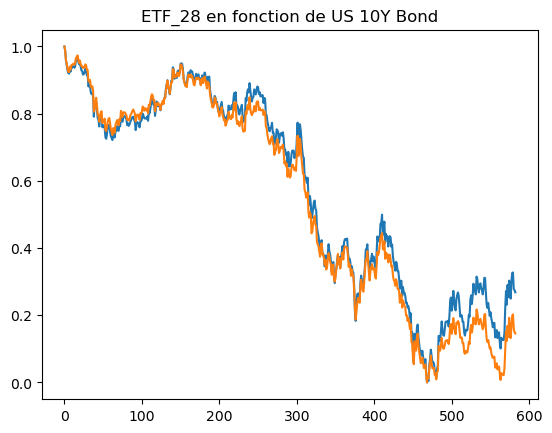

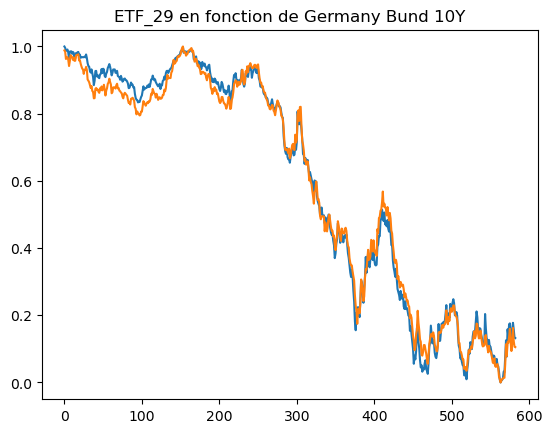

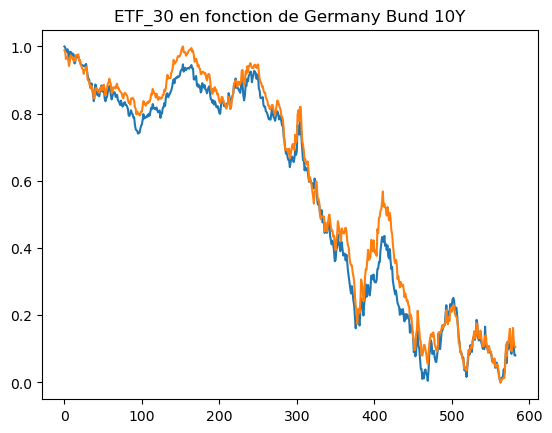

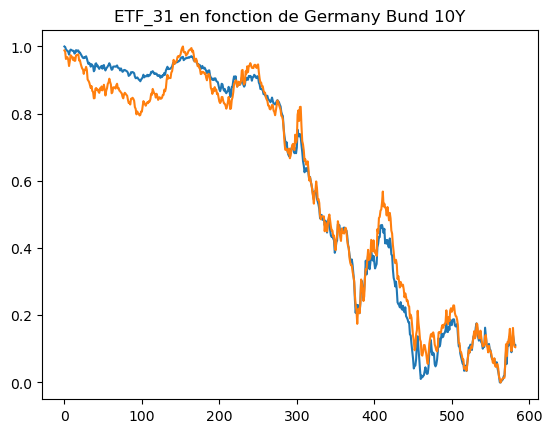

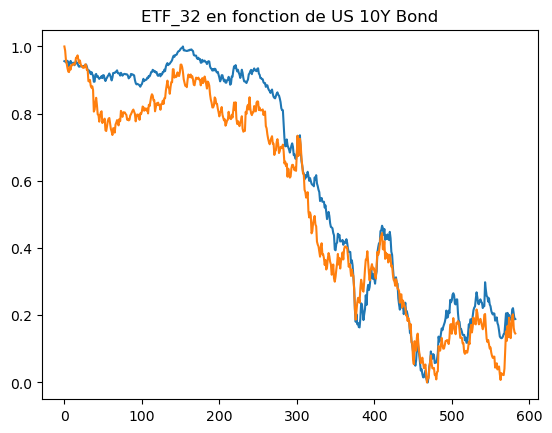

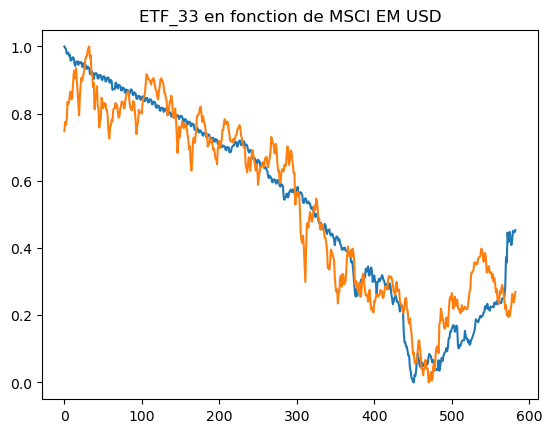

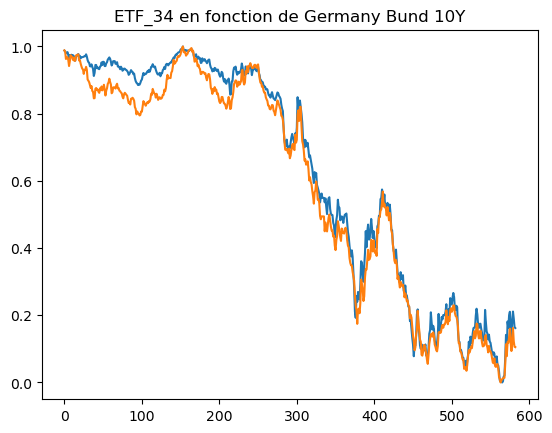

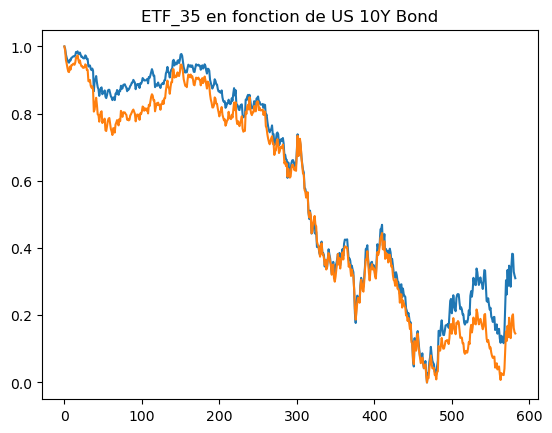

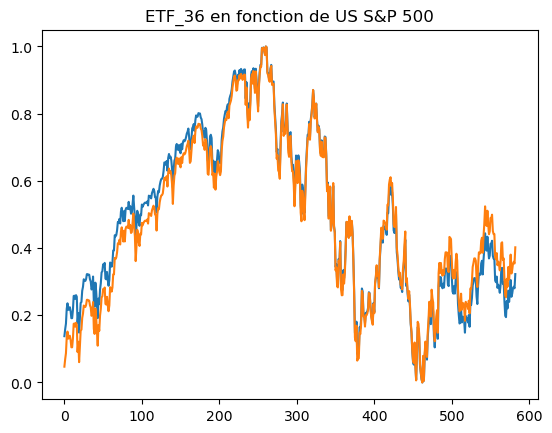

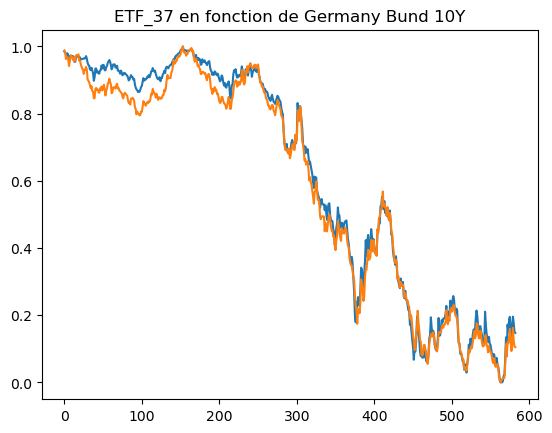

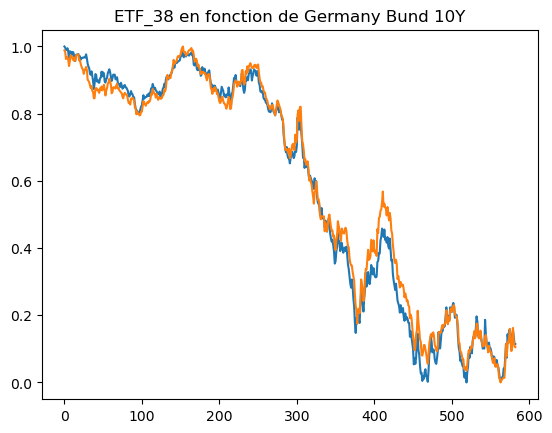

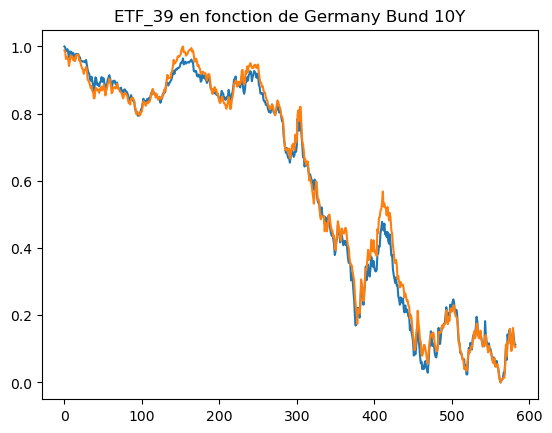

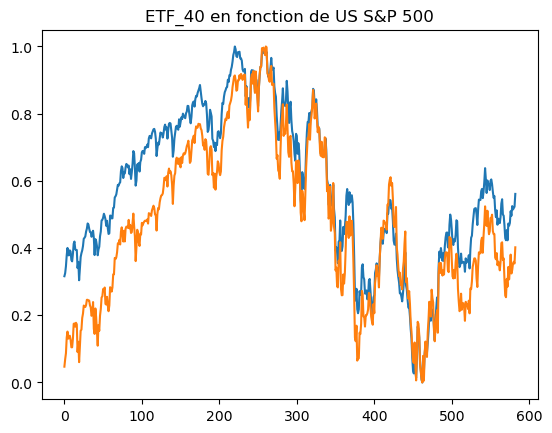

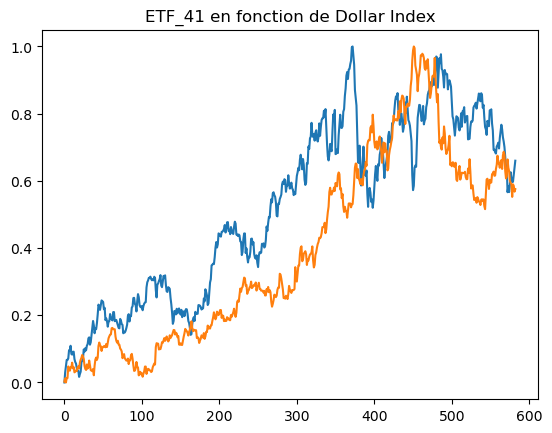

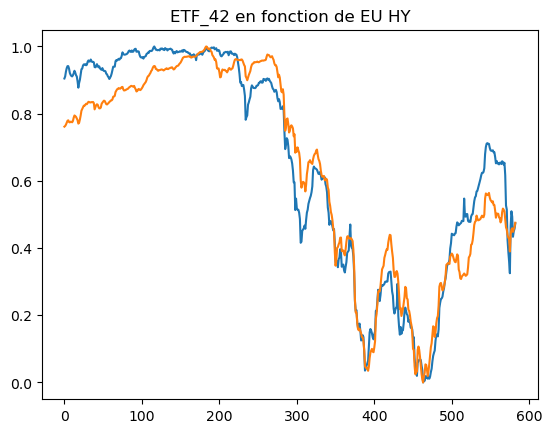

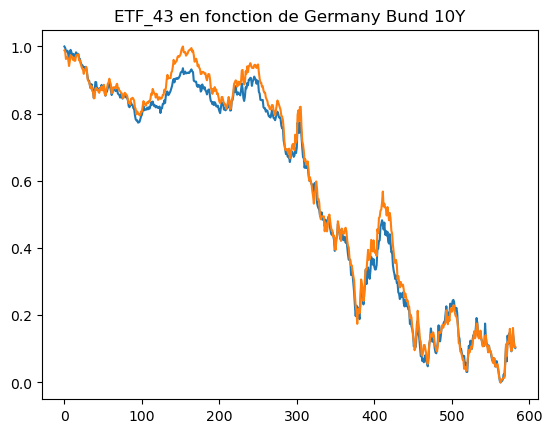

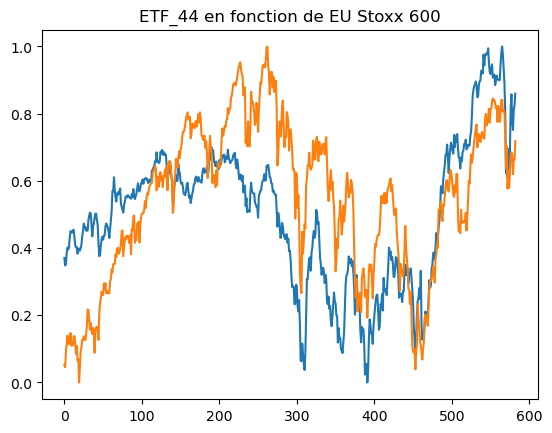

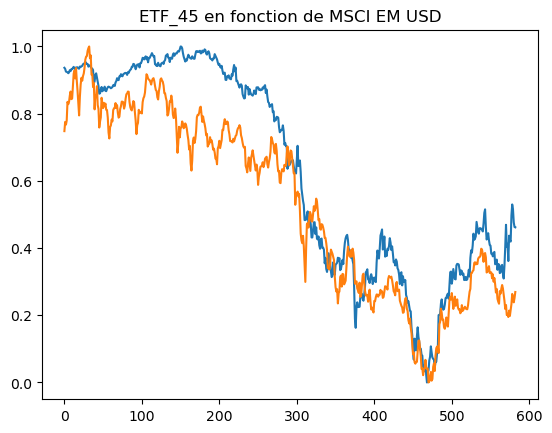

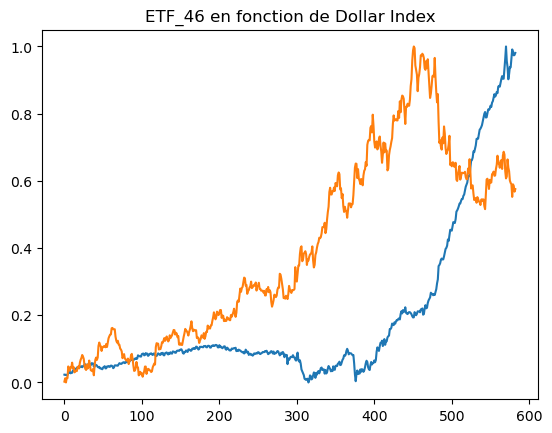

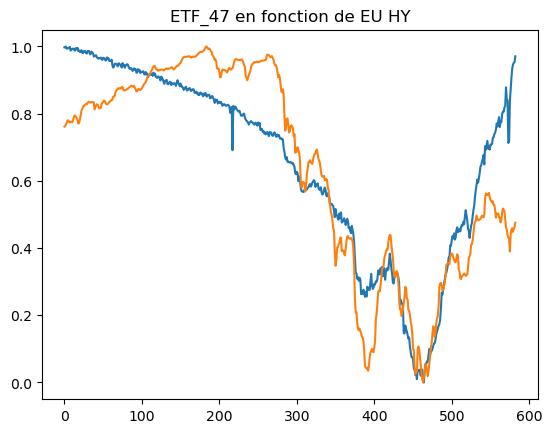

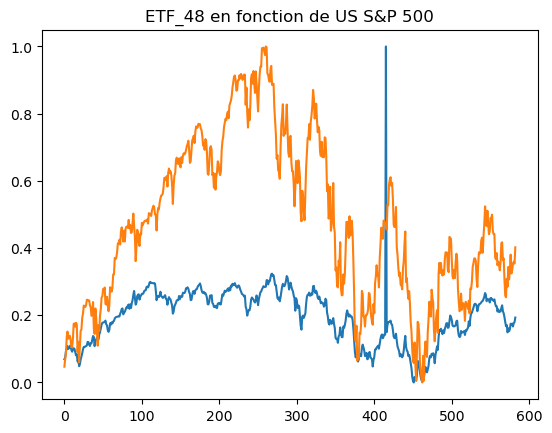

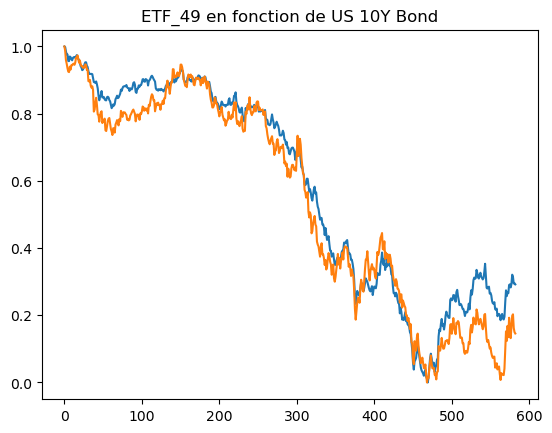

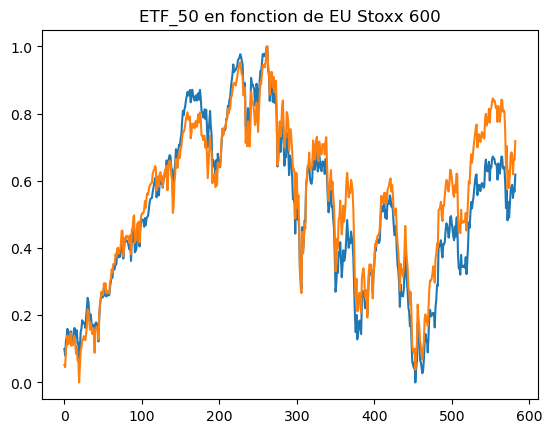

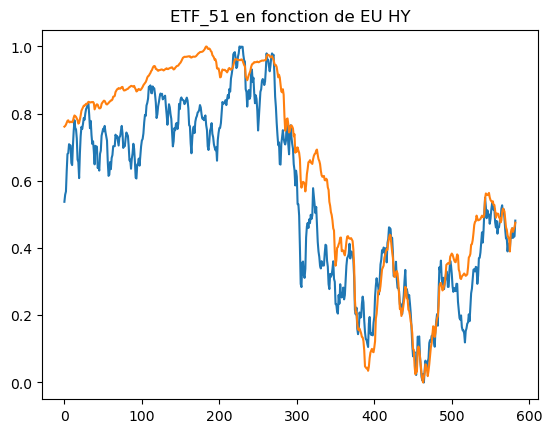

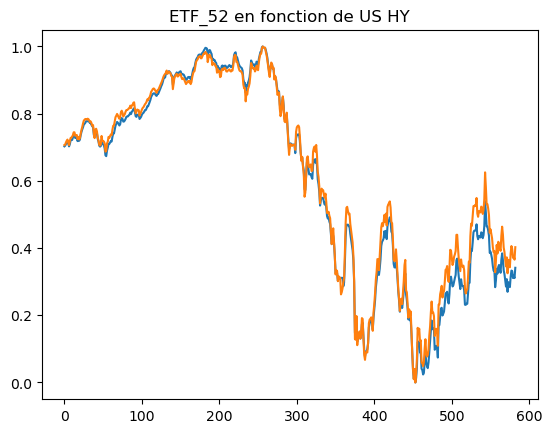

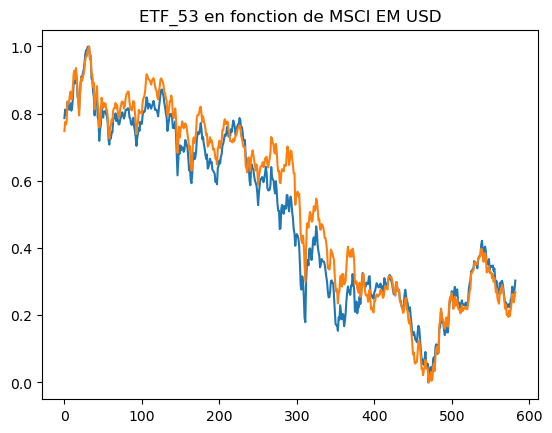

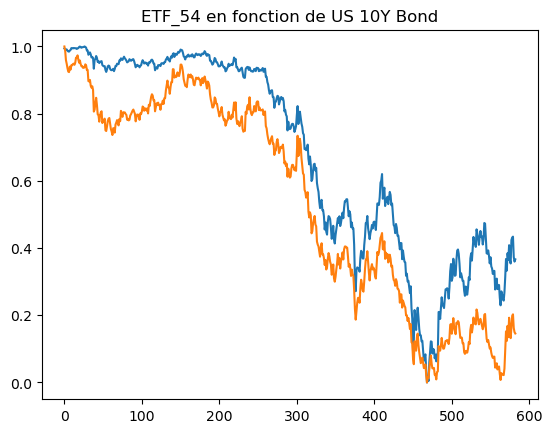

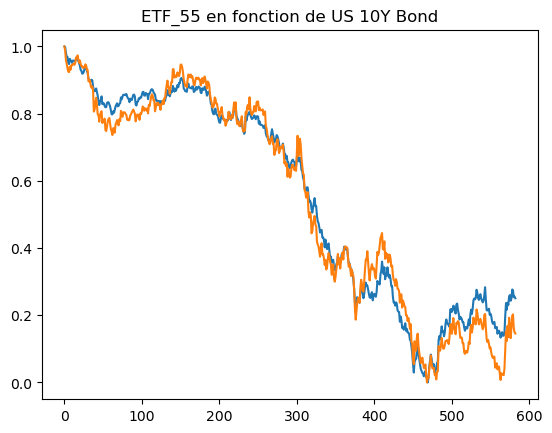

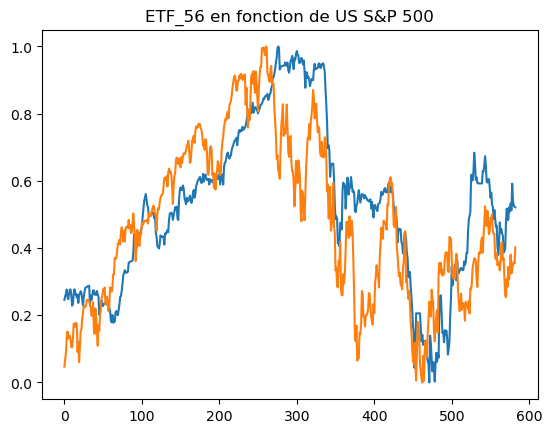

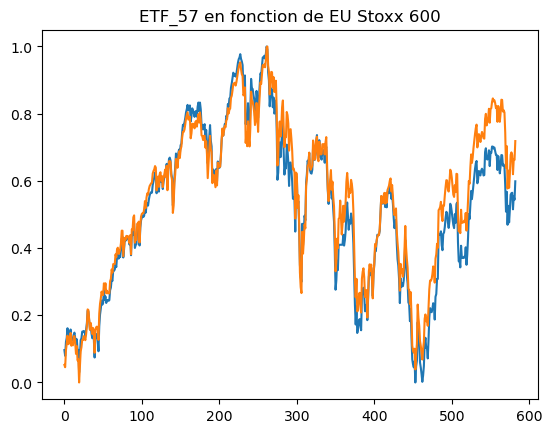

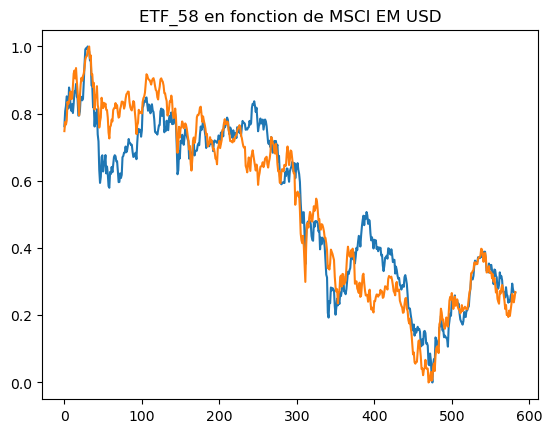

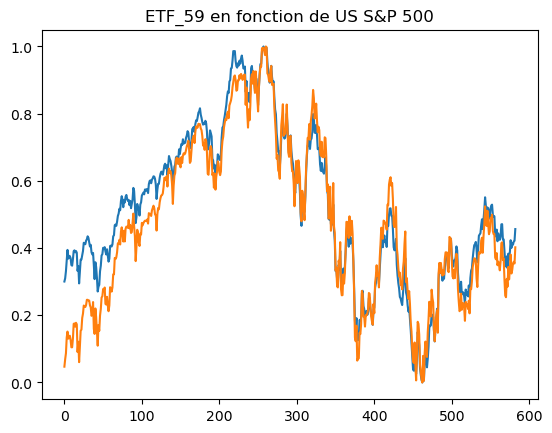

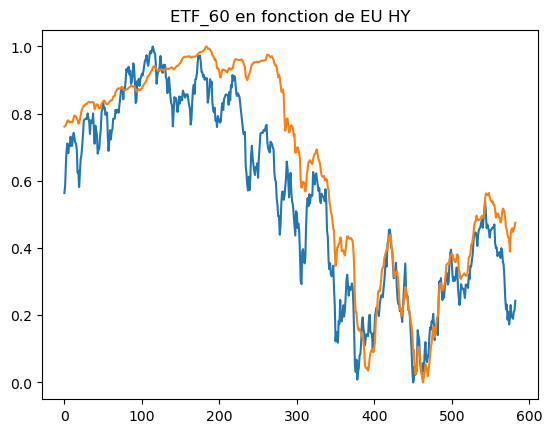

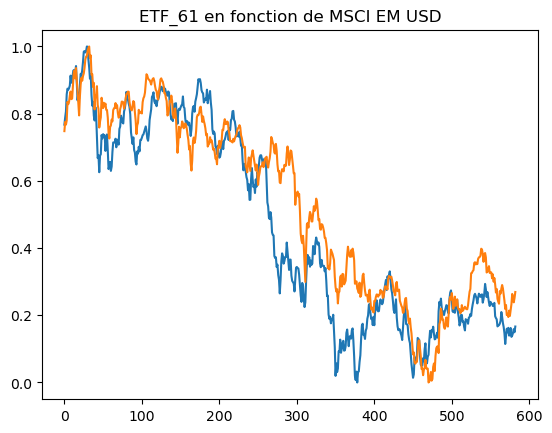

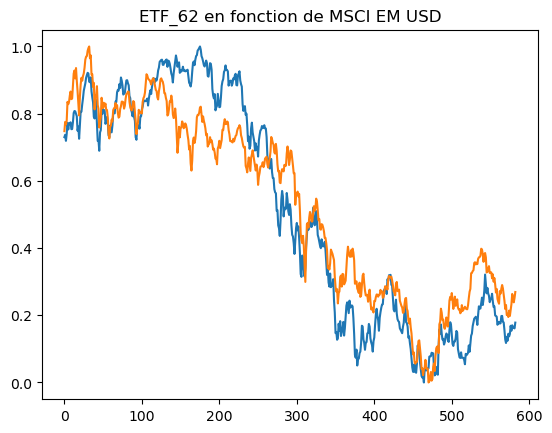

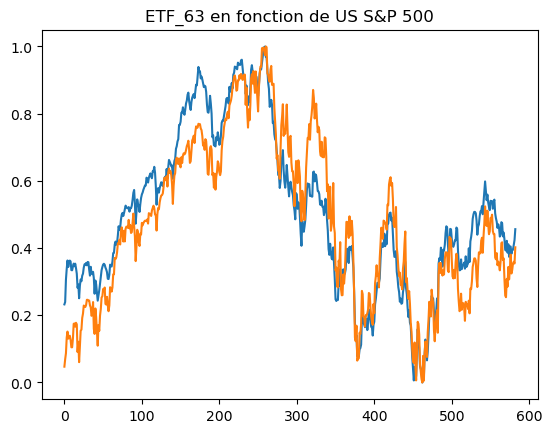

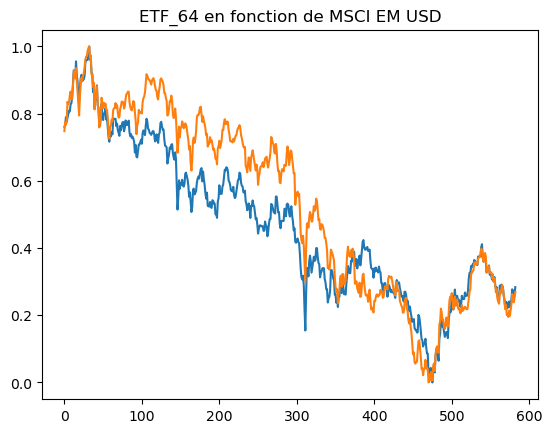

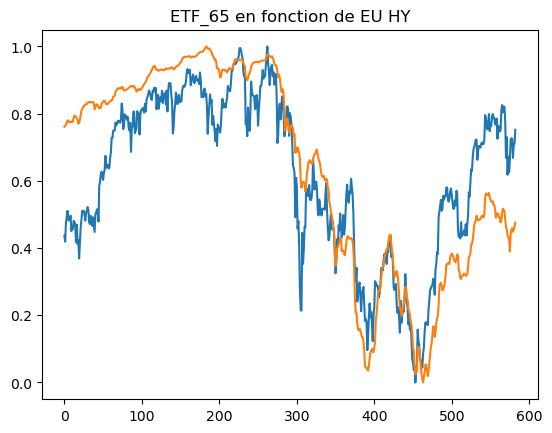

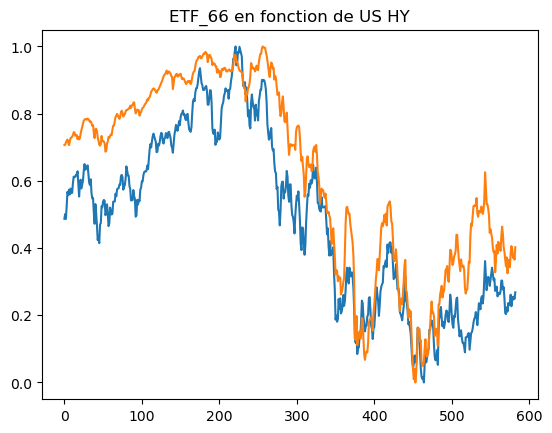

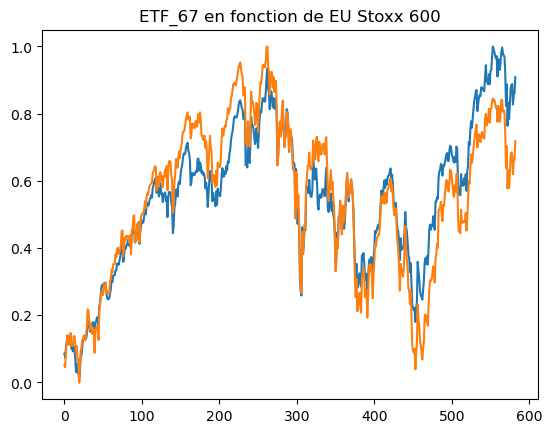

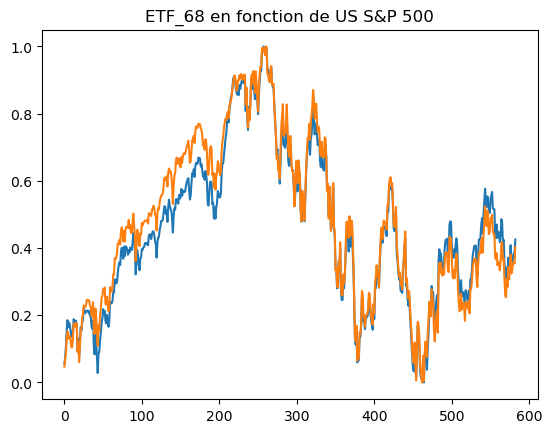

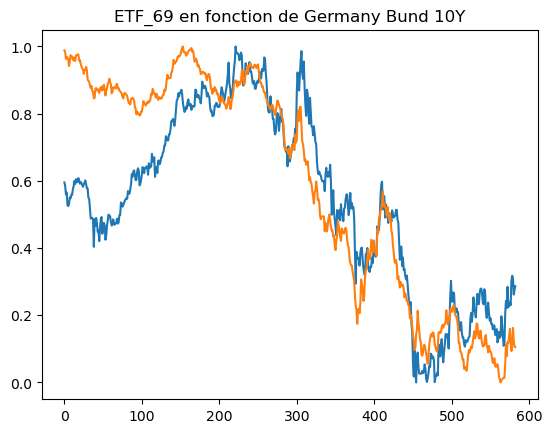

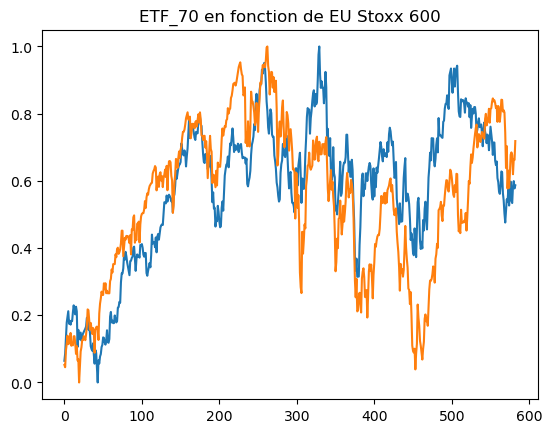

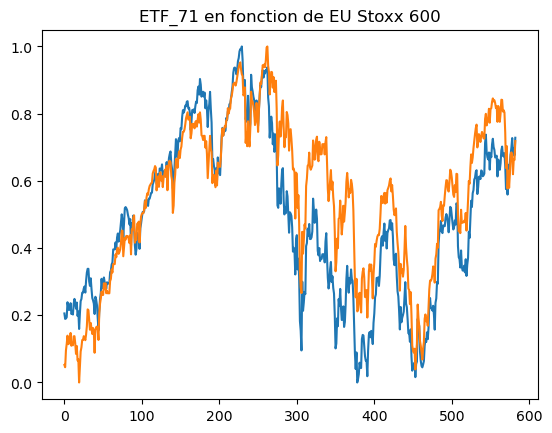

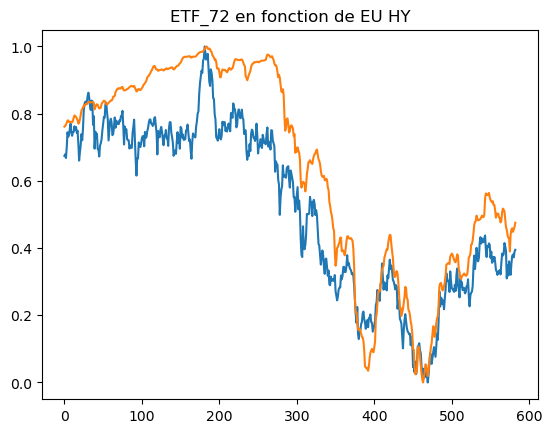

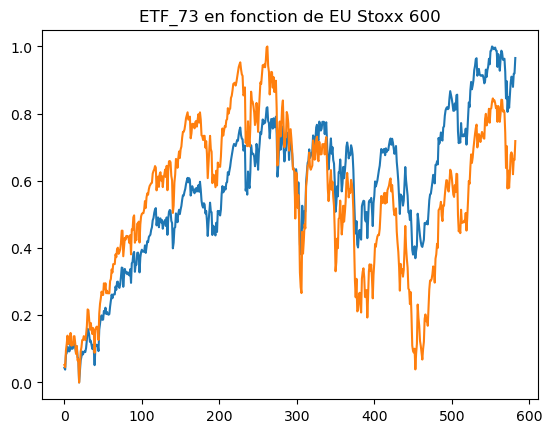

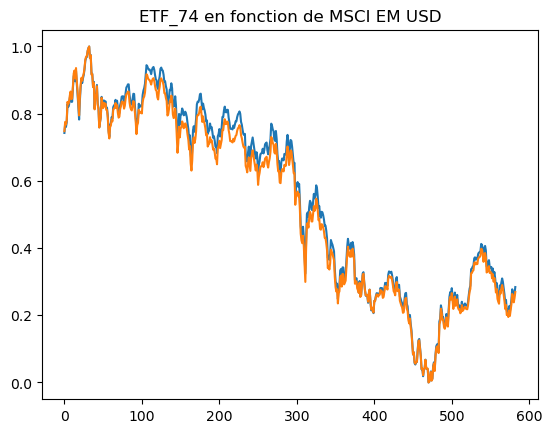

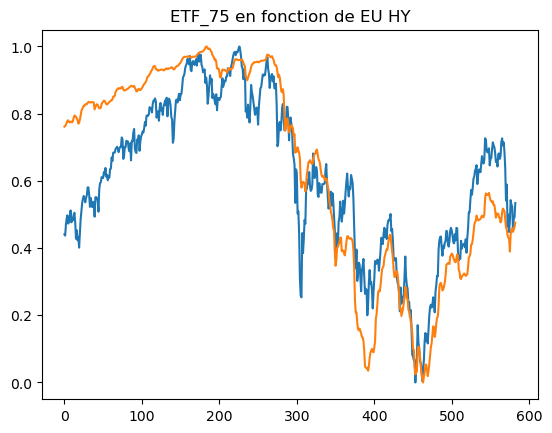

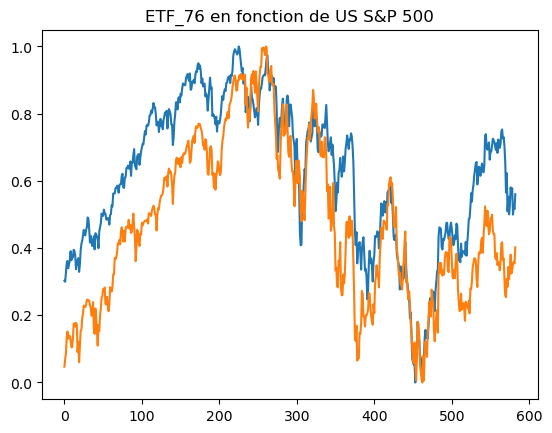

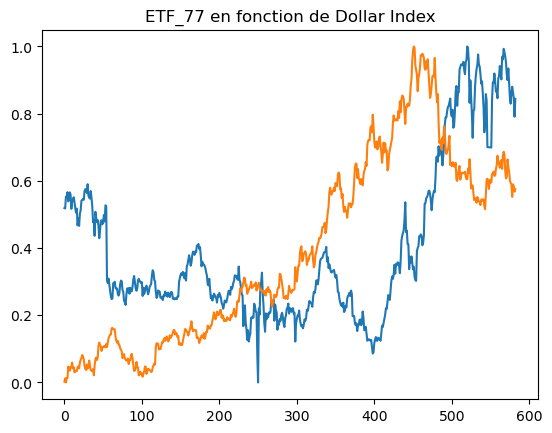

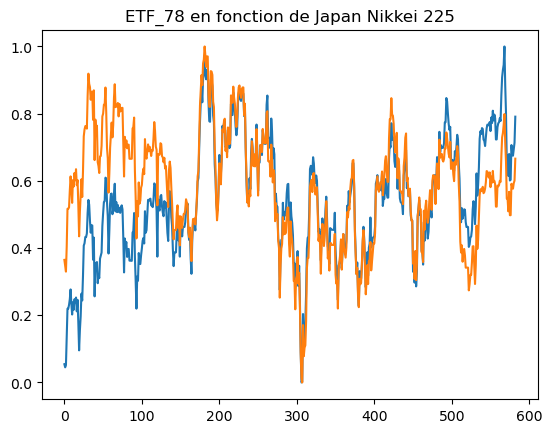

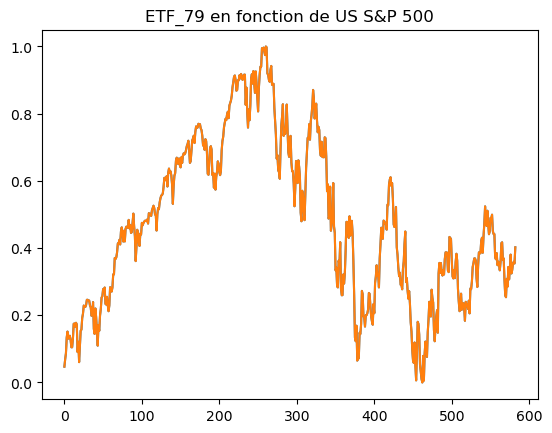

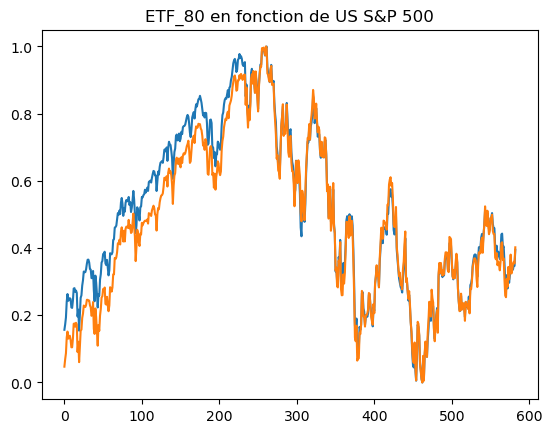

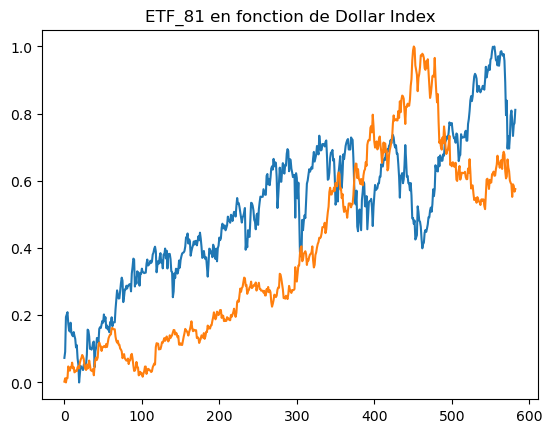

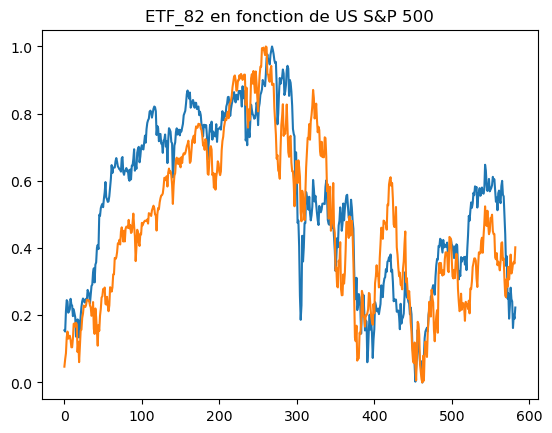

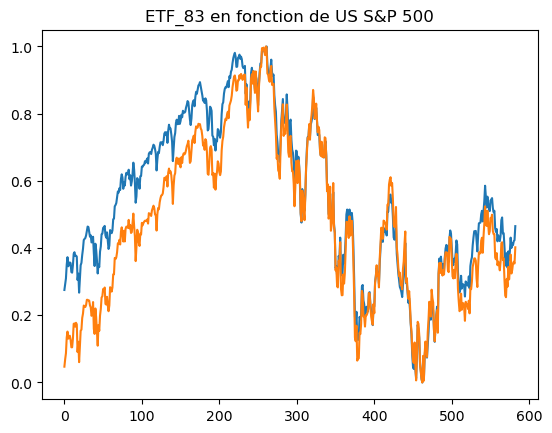

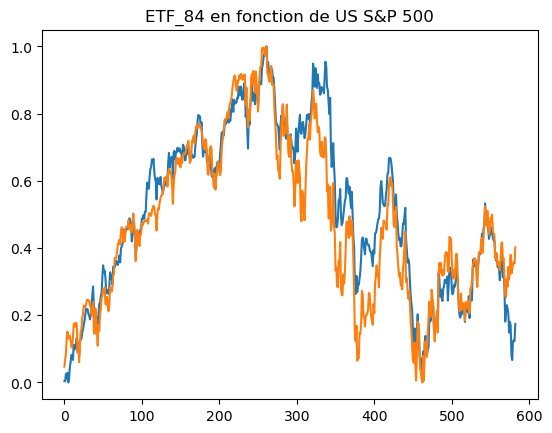

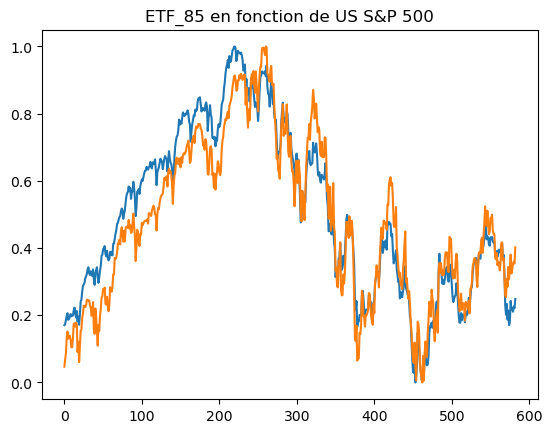

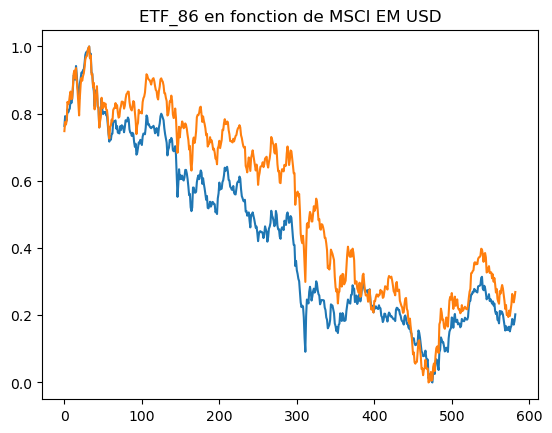

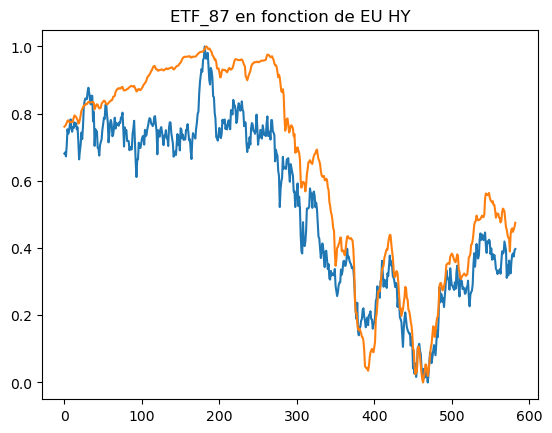

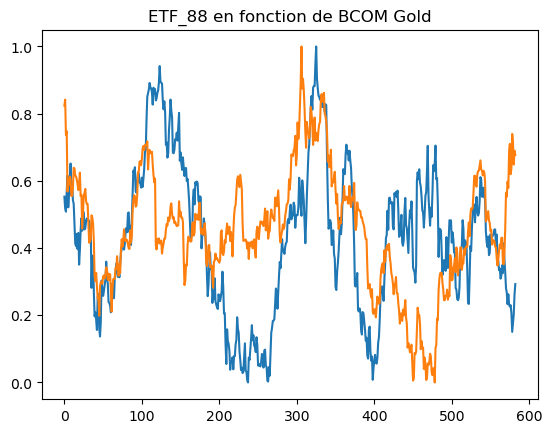

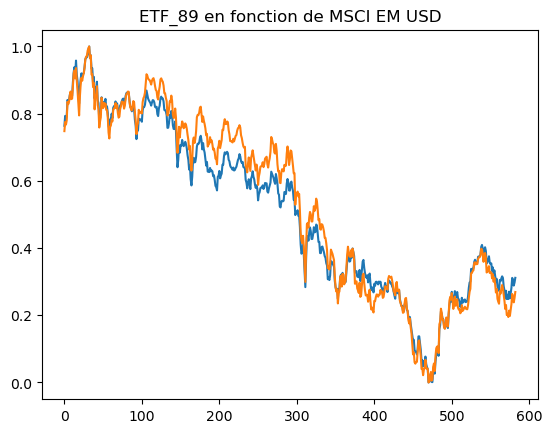

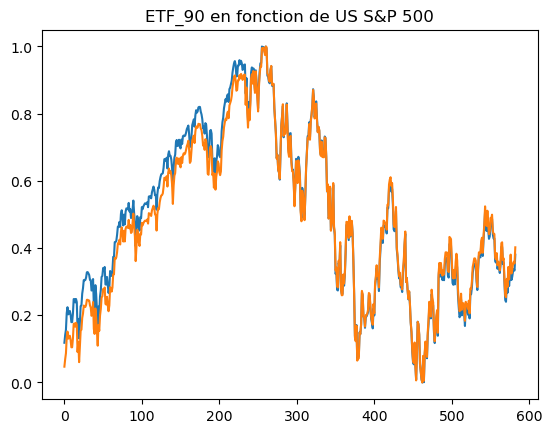

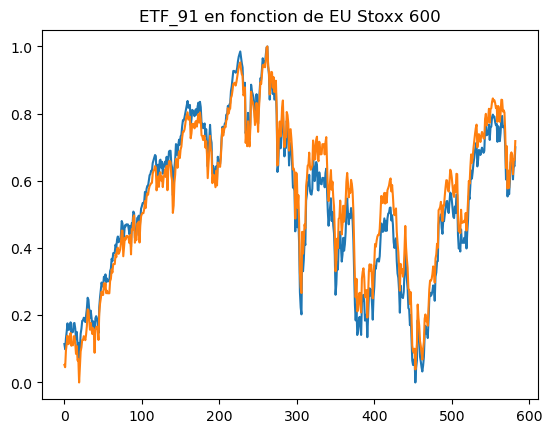

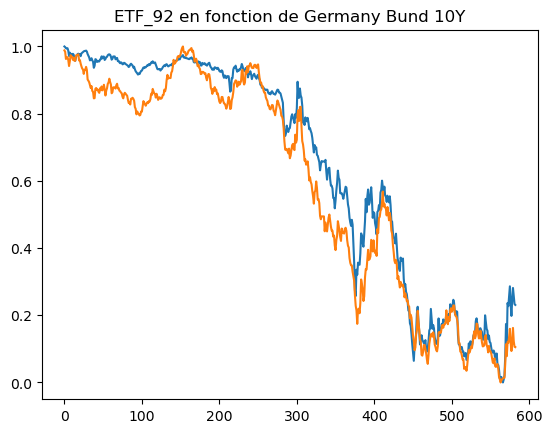

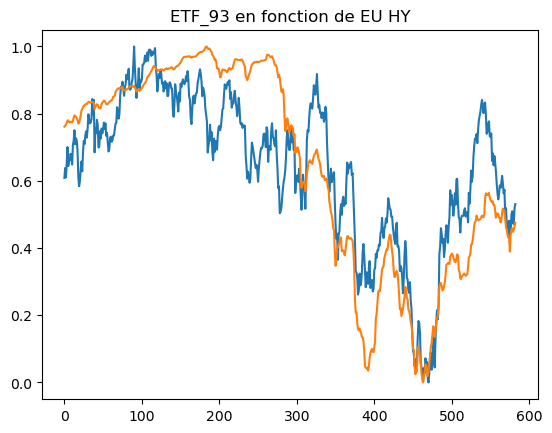

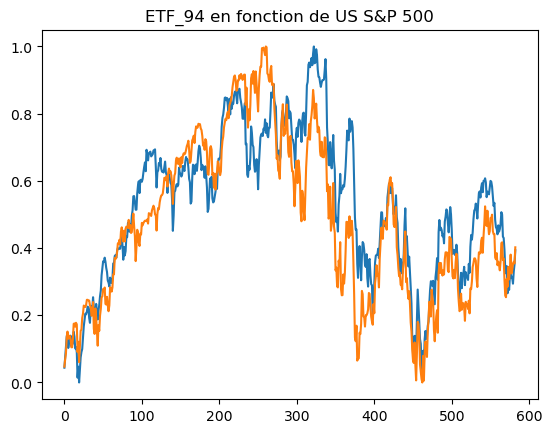

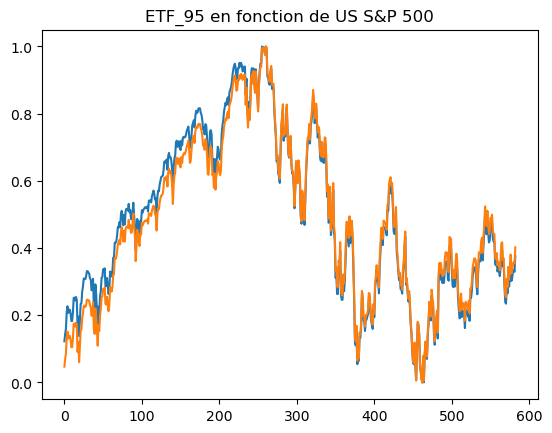

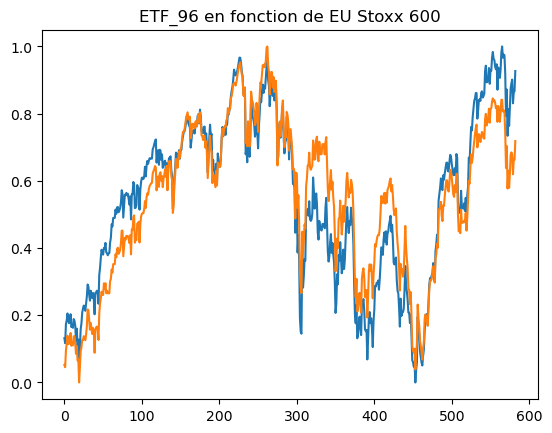

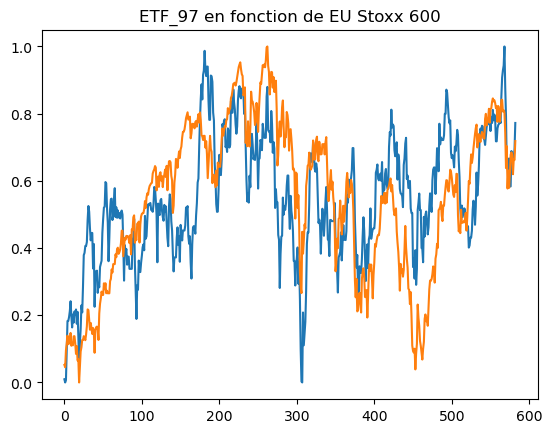

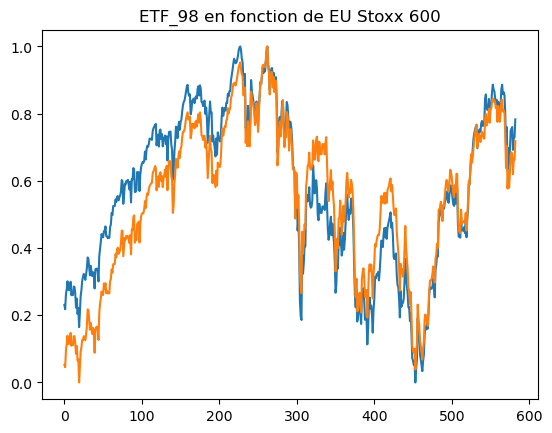

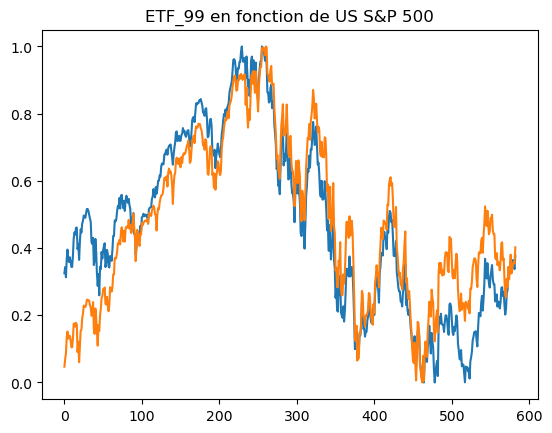

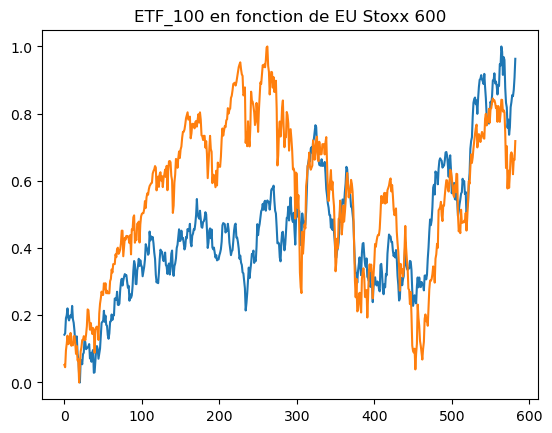

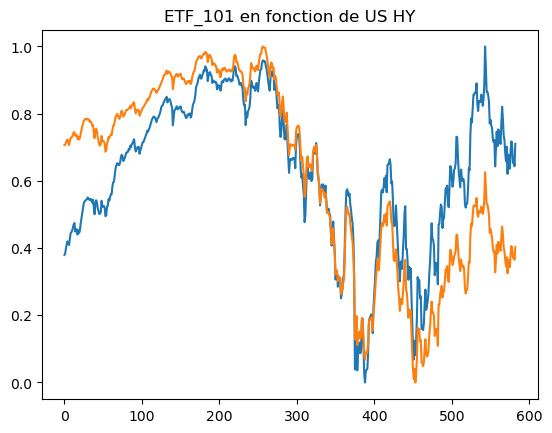

In [16]:
from sklearn.preprocessing import MinMaxScaler

df2['Unnamed: 0'] = pd.to_datetime(df2['Unnamed: 0'])

# filter rows with date >= '2021-01-04'
new_dff_1 = df2[(df2['Unnamed: 0'] >= '2021-01-04') & (df2['Unnamed: 0'] < '2023-03-30')]


#df_f1 = pd.concat([df.reset_index(drop=True), new_dff_1.reset_index(drop=True)] , axis = 1)

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df.drop("Unnamed: 0", axis=1)), columns=df.drop("Unnamed: 0", axis=1).columns)

scaler = MinMaxScaler()
df_norm_1 = pd.DataFrame(scaler.fit_transform(new_dff_1.drop("Unnamed: 0", axis=1)), columns=new_dff_1.drop("Unnamed: 0", axis=1).columns)


final_df_1 = pd.concat([df["Unnamed: 0"], df_norm], axis=1)

#final_df_2 = pd.concat([df2["Unnamed: 0"], df_norm_1], axis=1)

df_f1 = pd.concat([df.reset_index(drop=True), new_dff_1.reset_index(drop=True)] , axis = 1)

correlation_matrix = df_f1.corr()
corr_1 = correlation_matrix.iloc[:101,101:113]

#corr_1

import numpy as np

for i in range(len(corr_1)):
    # Select row 0
    row = corr_1.iloc[i]

    # Find the maximum row and its column name
    max_value = row.max()
    max_col_name = row.idxmax()
    index_name = row.name

    #Add information into a list
    result = [max_col_name, index_name ,round(max_value,2)]
    
    plt.title(index_name + " en fonction de " + max_col_name)
    plt.plot(final_df_1[index_name].reset_index(drop=True))
    plt.plot(df_norm_1[max_col_name].reset_index(drop=True))
    plt.show()

    #print(result)

# Tracking error

In [11]:
from sklearn.preprocessing import MinMaxScaler

df2['Unnamed: 0'] = pd.to_datetime(df2['Unnamed: 0'])

# filter rows with date >= '2021-01-04'
new_dff_1 = df2[(df2['Unnamed: 0'] >= '2021-01-04') & (df2['Unnamed: 0'] < '2023-03-30')]

#new_dff_1

#df_f1 = pd.concat([df.reset_index(drop=True), new_dff_1.reset_index(drop=True)] , axis = 1)

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df.drop("Unnamed: 0", axis=1)), columns=df.drop("Unnamed: 0", axis=1).columns)

scaler = MinMaxScaler()
df_norm_1 = pd.DataFrame(scaler.fit_transform(new_dff_1.drop("Unnamed: 0", axis=1)), columns=new_dff_1.drop("Unnamed: 0", axis=1).columns)


final_df_1 = pd.concat([df["Unnamed: 0"], df_norm], axis=1)

#final_df_2 = pd.concat([df2["Unnamed: 0"], df_norm_1], axis=1)

df_f1 = pd.concat([df.reset_index(drop=True), new_dff_1.reset_index(drop=True)] , axis = 1)

correlation_matrix = df_f1.corr()
corr_1 = correlation_matrix.iloc[:100,101:113]

#corr_1

import numpy as np

colonnes = ['diff '+str(i) for i in range(1, 101)]

diff = pd.DataFrame(columns=colonnes)

#diff["diff 1"] = df["ETF_1"].reset_index(drop=True).pct_change()-  new_dff_1["MSCI EM USD"].reset_index(drop=True).pct_change()

for i in range(len(corr_1)):
    # select row 0
    row = corr_1.iloc[i]

    # Find the maximum row and its column name
    max_value = row.max()
    max_col_name = row.idxmax()
    index_name = row.name

    # Add information into a list
    result = [max_col_name, index_name ,round(max_value,2)]
    
    diff["diff "+str(i+1)] = df[index_name].reset_index(drop=True).pct_change() - new_dff_1[max_col_name].reset_index(drop=True).pct_change()
    #print(tracking_error)
    
    print("For the ETF",i+1, "we have a tracking error of",diff["diff "+str(i+1)].std())
    #print(result)




<ipython-input-11-552b88051e30>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_f1.corr()


For the ETF 1 we have a tracking error of 0.014098469450051608
For the ETF 2 we have a tracking error of 0.014953318144265175
For the ETF 3 we have a tracking error of 0.011282864304883719
For the ETF 4 we have a tracking error of 0.01849074984917365
For the ETF 5 we have a tracking error of 0.014932489839258023
For the ETF 6 we have a tracking error of 0.010767778372206131
For the ETF 7 we have a tracking error of 0.010406638376062323
For the ETF 8 we have a tracking error of 0.010693394883144854
For the ETF 9 we have a tracking error of 0.01298062619342303
For the ETF 10 we have a tracking error of 0.012020625451735595
For the ETF 11 we have a tracking error of 0.005487724068726352
For the ETF 12 we have a tracking error of 0.012924697405514721
For the ETF 13 we have a tracking error of 0.02093178659995829
For the ETF 14 we have a tracking error of 0.007306497158257713
For the ETF 15 we have a tracking error of 0.007797471301569368
For the ETF 16 we have a tracking error of 0.0031753

In [6]:
diff

diff 1    diff 2    diff 3    diff 4    diff 5    diff 6    diff 7  \
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1   -0.005277  0.000646 -0.005602  0.008399 -0.006757  0.002399 -0.002398   
2   -0.017488 -0.006695 -0.022612  0.057304 -0.009145 -0.004946  0.016519   
3    0.006702 -0.009165  0.008619  0.063816  0.000392  0.011020  0.020694   
4   -0.002800  0.026224 -0.011110 -0.013222  0.015157  0.019931  0.002495   
..        ...       ...       ...       ...       ...       ...       ...   
578  0.007834  0.023240 -0.002218 -0.006420 -0.007675  0.007150  0.000789   
579  0.009920 -0.018485 -0.006101 -0.004736 -0.005696  0.003098  0.000378   
580  0.004883  0.001642  0.008245  0.010599 -0.000786 -0.006243 -0.000702   
581 -0.016436 -0.011714  0.003752 -0.006941  0.002504  0.006165  0.003816   
582  0.003185  0.020615 -0.011603  0.009040 -0.003508 -0.003136  0.002694   

       diff 8    diff 9   diff 10  ...   diff 91   diff 92   diff 93  \
0         NaN       NaN       NaN  ...       NaN       NaN       NaN   
1    0.010043 -0.007673 -0.006915  ... -0.002477  0.001205  0.008106   
2   -0.007289  0.023349 -0.004758  ... -0.004509  0.006971 -0.008370   
3    0.014687 -0.006660 -0.013831  ...  0.000685 -0.001847  0.010637   
4    0.003494  0.006435 -0.003238  ...  0.000125  0.000120  0.012977   
..        ...       ...       ...  ...       ...       ...       ...   
578  0.022322  0.000312  0.007462  ...  0.002145 -0.008372  0.002309   
579 -0.020172  0.013064 -0.004789  ... -0.000682 -0.019204 -0.008190   
580 -0.010314  0.014630 -0.006057  ...  0.000023  0.016767 -0.002381   
581 -0.008292  0.008612 -0.002076  ... -0.000337  0.006319  0.012750   
582  0.011394  0.000518 -0.012643  ...  0.000776  0.000366  0.001586   

      diff 94   diff 95   diff 96   diff 97   diff 98   diff 99  diff 100  
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1    0.002863  0.000231 -0.002764  0.000014 -0.002086  0.001379  0.003898  
2    0.005418 -0.000844  0.004153 -0.012356 -0.000006 -0.019705  0.009241  
3   -0.004585  0.001135 -0.001992  0.012205 -0.000380  0.010063 -0.000987  
4   -0.001647  0.000151 -0.000326  0.010123  0.000408  0.007228  0.003579  
..        ...       ...       ...       ...       ...       ...       ...  
578 -0.002732 -0.000042  0.004539 -0.002426  0.003217  0.009853  0.009633  
579 -0.011164 -0.000395 -0.004267  0.012049 -0.004658 -0.002672  0.012095  
580  0.009680  0.000232 -0.002377 -0.007678 -0.001216 -0.009007 -0.003633  
581  0.008383 -0.000084  0.001433  0.003950  0.001057 -0.003376  0.014102  
582 -0.001232  0.000261  0.002054  0.000488  0.001315  0.004434  0.007392  

[583 rows x 100 columns]

In [6]:
rendement = df["ETF_1"].pct_change()
rendement

0           NaN
1      0.006644
2     -0.021007
3      0.012036
4      0.020835
         ...   
578    0.024771
579    0.004462
580   -0.003329
581   -0.009438
582    0.013144
Name: ETF_1, Length: 583, dtype: float64

In [15]:
# Initialize an empty dictionary to store ETF names and tracking errors
etf_tracking_error = {}

for i in range(len(corr_1)):
    # Sélectionner la ligne 0
    row = corr_1.iloc[i]

    # find maximum row and its column name
    max_value = row.max()
    max_col_name = row.idxmax()
    index_name = row.name

    # Add information into a list
    result = [max_col_name, index_name ,round(max_value,2)]
    
    diff_col_name = "diff "+str(i+1)
    tracking_error = diff[diff_col_name].std()
    etf_name = "ETF_" + str(i+1)
    
    # Store the ETF name and its tracking error in the dictionary
    etf_tracking_error[etf_name] = tracking_error
    
    print("Pour l'ETF", etf_name, "on a un tracking error égale à", tracking_error)

# Convert the dictionary into a dataframe
etf_tracking_error_df = pd.DataFrame.from_dict(etf_tracking_error, orient='index', columns=['tracking_error'])

# Add a new column for ETF names
etf_tracking_error_df['ETF'] = etf_tracking_error_df.index

etf_tracking_error_df



Pour l'ETF ETF_1 on a un tracking error égale à 0.014098469450051608
Pour l'ETF ETF_2 on a un tracking error égale à 0.014953318144265175
Pour l'ETF ETF_3 on a un tracking error égale à 0.011282864304883719
Pour l'ETF ETF_4 on a un tracking error égale à 0.01849074984917365
Pour l'ETF ETF_5 on a un tracking error égale à 0.014932489839258023
Pour l'ETF ETF_6 on a un tracking error égale à 0.010767778372206131
Pour l'ETF ETF_7 on a un tracking error égale à 0.010406638376062323
Pour l'ETF ETF_8 on a un tracking error égale à 0.010693394883144854
Pour l'ETF ETF_9 on a un tracking error égale à 0.01298062619342303
Pour l'ETF ETF_10 on a un tracking error égale à 0.012020625451735595
Pour l'ETF ETF_11 on a un tracking error égale à 0.005487724068726352
Pour l'ETF ETF_12 on a un tracking error égale à 0.012924697405514721
Pour l'ETF ETF_13 on a un tracking error égale à 0.02093178659995829
Pour l'ETF ETF_14 on a un tracking error égale à 0.007306497158257713
Pour l'ETF ETF_15 on a un tracki

tracking_error      ETF
ETF_1          0.014098    ETF_1
ETF_2          0.014953    ETF_2
ETF_3          0.011283    ETF_3
ETF_4          0.018491    ETF_4
ETF_5          0.014932    ETF_5
...                 ...      ...
ETF_96         0.003559   ETF_96
ETF_97         0.012452   ETF_97
ETF_98         0.002750   ETF_98
ETF_99         0.006335   ETF_99
ETF_100        0.011155  ETF_100

[100 rows x 2 columns]

In [17]:
etf_tracking_error_df

ETF  tracking_error
ETF_1      ETF_1        0.014098
ETF_2      ETF_2        0.014953
ETF_3      ETF_3        0.011283
ETF_4      ETF_4        0.018491
ETF_5      ETF_5        0.014932
...          ...             ...
ETF_96    ETF_96        0.003559
ETF_97    ETF_97        0.012452
ETF_98    ETF_98        0.002750
ETF_99    ETF_99        0.006335
ETF_100  ETF_100        0.011155

[100 rows x 2 columns]

In [19]:
import pandas as pd

# create an empty DataFrame with the desired columns
result_df = pd.DataFrame(columns=['diff', 'max', 'max_index', 'max_count', 'min', 'min_index', 'min_count'])

# loop through each column and append the results to the DataFrame
for col in diff.columns:
    max_val = diff[col].max()
    max_idx = diff[col].idxmax()
    max_count = diff[col].value_counts()[max_val]
    min_val = diff[col].min()
    min_idx = diff[col].idxmin()
    min_count = diff[col].value_counts()[min_val]
    result_df = result_df.append({
        'diff': col,
        'max': max_val,
        'max_index': max_idx,
        'max_count': max_count,
        'min': min_val,
        'min_index': min_idx,
        'min_count': min_count
    }, ignore_index=True)

# print the resulting DataFrame
result_df



<ipython-input-19-535a399597df>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-19-535a399597df>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-19-535a399597df>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-19-535a399597df>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-19-535a399597df>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df

<ipython-input-19-535a399597df>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-19-535a399597df>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-19-535a399597df>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-19-535a399597df>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-19-535a399597df>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df

diff       max max_index max_count       min min_index min_count
0     diff 1  0.076918       483         1 -0.046603       283         1
1     diff 2  0.066611       307         1 -0.053836       275         1
2     diff 3  0.048178       307         1 -0.041766       435         1
3     diff 4  0.098060       298         1 -0.072436        42         1
4     diff 5  0.053707       464         1 -0.064818       483         1
..       ...       ...       ...       ...       ...       ...       ...
95   diff 96  0.027564       307         1 -0.016666       301         1
96   diff 97  0.056548       308         1 -0.047340       307         1
97   diff 98  0.023243       307         1 -0.013772       301         1
98   diff 99  0.026073        46         1 -0.023809        45         1
99  diff 100  0.035862       249         1 -0.032107        38         1

[100 rows x 7 columns]

In [20]:
max_index_counts = result_df['max_index'].value_counts()
min_index_counts = result_df['min_index'].value_counts()
min_index_counts

298    9
456    9
350    6
483    5
312    4
301    4
307    3
452    3
42     3
470    3
35     2
304    2
305    2
39     2
344    2
404    2
343    1
434    1
306    1
278    1
543    1
383    1
283    1
55     1
313    1
170    1
356    1
345    1
569    1
379    1
2      1
398    1
45     1
340    1
402    1
508    1
234    1
435    1
446    1
389    1
477    1
300    1
498    1
352    1
570    1
388    1
474    1
40     1
544    1
275    1
416    1
103    1
360    1
348    1
38     1
Name: min_index, dtype: int64

In [21]:
# Count number of positive and negative values in each column, excluding the first row
pos_counts = diff.iloc[1:].apply(lambda x: x[x > 0].count())
neg_counts = diff.iloc[1:].apply(lambda x: x[x < 0].count())

# Combine into a new dataframe
counts_df = pd.concat([pos_counts, neg_counts], axis=1)
counts_df.columns = ['positive', 'negative']
counts_df

positive  negative
diff 1         301       281
diff 2         295       287
diff 3         295       282
diff 4         274       308
diff 5         280       302
...            ...       ...
diff 96        303       274
diff 97        291       291
diff 98        292       285
diff 99        285       277
diff 100       298       282

[100 rows x 2 columns]

## Mistery allocation

['ETF_40', 'Mystery_Allocation', 0.97]


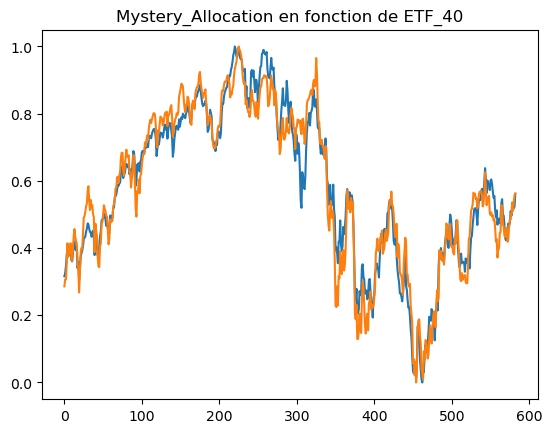

In [46]:
from sklearn.preprocessing import MinMaxScaler

#df2['Unnamed: 0'] = pd.to_datetime(df2['Unnamed: 0'])
df3['Unnamed: 0'] = pd.to_datetime(df3['Unnamed: 0'])

# filter rows with date >= '2021-01-04'
#new_dff_1 = df2[(df2['Unnamed: 0'] >= '2021-01-04') & (df2['Unnamed: 0'] < '2023-03-30')]

#new_dff_1

#df_f1 = pd.concat([df.reset_index(drop=True), new_dff_1.reset_index(drop=True)] , axis = 1)

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df.drop("Unnamed: 0", axis=1)), columns=df.drop("Unnamed: 0", axis=1).columns)

scaler = MinMaxScaler()
df_norm_2 = pd.DataFrame(scaler.fit_transform(df3.drop("Unnamed: 0", axis=1)), columns=df3.drop("Unnamed: 0", axis=1).columns)


final_df_2 = pd.concat([df["Unnamed: 0"], df_norm], axis=1)

#final_df_2 = pd.concat([df2["Unnamed: 0"], df_norm_1], axis=1)

df_f1 = pd.concat([df.reset_index(drop=True), df3.reset_index(drop=True)] , axis = 1)

correlation_matrix = df_f1.corr()

corr_2 = correlation_matrix.iloc[101:102,:len(correlation_matrix)-1]

row = corr_2.iloc[0]

# Find the Maximum row and its column name
max_value = row.max()
max_col_name = row.idxmax()
index_name = row.name

# Add information into a list
result = [max_col_name, index_name ,round(max_value,2)]

print(result)

plt.title(index_name + " en fonction de " + max_col_name)
plt.plot(final_df_2[max_col_name].reset_index(drop=True))
plt.plot(df_norm_2[index_name].reset_index(drop=True))
plt.show()


['US S&P 500', 'Mystery_Allocation', 0.91]


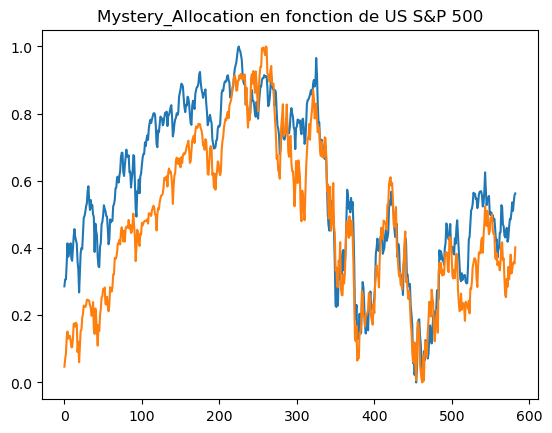

In [47]:
from sklearn.preprocessing import MinMaxScaler

#df2['Unnamed: 0'] = pd.to_datetime(df2['Unnamed: 0'])
df3['Unnamed: 0'] = pd.to_datetime(df3['Unnamed: 0'])

# filter rows with date >= '2021-01-04'
new_dff_1 = df2[(df2['Unnamed: 0'] >= '2021-01-04') & (df2['Unnamed: 0'] < '2023-03-30')]

#new_dff_1

#df_f1 = pd.concat([df.reset_index(drop=True), new_dff_1.reset_index(drop=True)] , axis = 1)

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df3.drop("Unnamed: 0", axis=1)), columns=df3.drop("Unnamed: 0", axis=1).columns)

scaler = MinMaxScaler()
df_norm_2 = pd.DataFrame(scaler.fit_transform(new_dff_1.drop("Unnamed: 0", axis=1)), columns=new_dff_1.drop("Unnamed: 0", axis=1).columns)

final_df_2 = pd.concat([df3["Unnamed: 0"], df_norm], axis=1)

#final_df_2 = pd.concat([df2["Unnamed: 0"], df_norm_1], axis=1)

df_f1 = pd.concat([df3.reset_index(drop=True), new_dff_1.reset_index(drop=True)] , axis = 1)

correlation_matrix = df_f1.corr()

corr_2 = correlation_matrix.iloc[:1,1:13]

row = corr_2.iloc[0]

# Find the maximum row and its column name
max_value = row.max()
max_col_name = row.idxmax()
index_name = row.name

# Add information into a list
result = [max_col_name, index_name ,round(max_value,2)]

print(result)
plt.title(index_name + " en fonction de " + max_col_name)
plt.plot(final_df_2[index_name].reset_index(drop=True))
plt.plot(df_norm_2[max_col_name].reset_index(drop=True))
plt.show()



['ETF_14', 'Mystery_Allocation', 0.97]


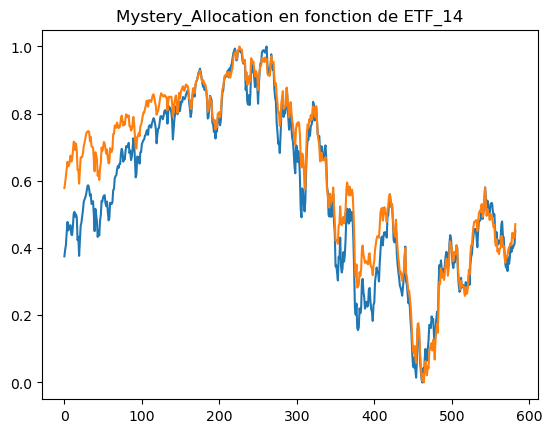

In [42]:
from sklearn.preprocessing import MinMaxScaler

#df2['Unnamed: 0'] = pd.to_datetime(df2['Unnamed: 0'])
df4['Unnamed: 0'] = pd.to_datetime(df4['Unnamed: 0'])

# filter rows with date >= '2021-01-04'
#new_dff_1 = df2[(df2['Unnamed: 0'] >= '2021-01-04') & (df2['Unnamed: 0'] < '2023-03-30')]

#new_dff_1

#df_f1 = pd.concat([df.reset_index(drop=True), new_dff_1.reset_index(drop=True)] , axis = 1)

scaler = MinMaxScaler()
df_norm_4 = pd.DataFrame(scaler.fit_transform(df.drop("Unnamed: 0", axis=1)), columns=df.drop("Unnamed: 0", axis=1).columns)

scaler = MinMaxScaler()
df_norm_3 = pd.DataFrame(scaler.fit_transform(df4.drop("Unnamed: 0", axis=1)), columns=df4.drop("Unnamed: 0", axis=1).columns)


final_df_3 = pd.concat([df["Unnamed: 0"], df_norm_4], axis=1)

#final_df_2 = pd.concat([df2["Unnamed: 0"], df_norm_1], axis=1)

df_f1 = pd.concat([df.reset_index(drop=True), df4.reset_index(drop=True)] , axis = 1)

correlation_matrix = df_f1.corr()

corr_2 = correlation_matrix.iloc[101:102,:len(correlation_matrix)-1]

row = corr_2.iloc[0]

# find the maximum row and its column name
max_value = row.max()
max_col_name = row.idxmax()
index_name = row.name

# Add information into a list
result = [max_col_name, index_name ,round(max_value,2)]

print(result)

plt.title(index_name + " en fonction de " + max_col_name)
plt.plot(final_df_3[max_col_name].reset_index(drop=True))
plt.plot(df_norm_3[index_name].reset_index(drop=True))
plt.show()


['US HY', 'Mystery_Allocation', 0.96]


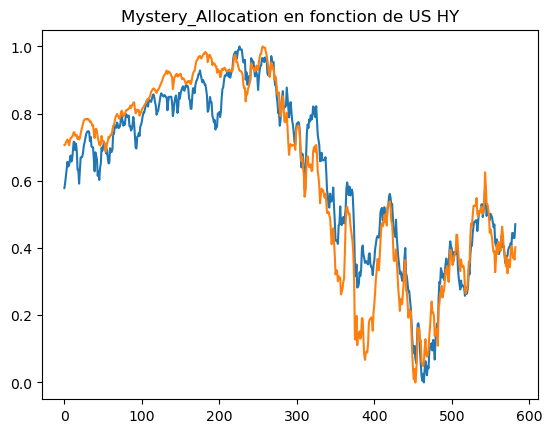

In [43]:
from sklearn.preprocessing import MinMaxScaler

#df2['Unnamed: 0'] = pd.to_datetime(df2['Unnamed: 0'])
df4['Unnamed: 0'] = pd.to_datetime(df4['Unnamed: 0'])

# filter rows with date >= '2021-01-04'
new_dff_1 = df2[(df2['Unnamed: 0'] >= '2021-01-04') & (df2['Unnamed: 0'] < '2023-03-30')]

#new_dff_1

#df_f1 = pd.concat([df.reset_index(drop=True), new_dff_1.reset_index(drop=True)] , axis = 1)

scaler = MinMaxScaler()
df_norm_4 = pd.DataFrame(scaler.fit_transform(df4.drop("Unnamed: 0", axis=1)), columns=df4.drop("Unnamed: 0", axis=1).columns)

scaler = MinMaxScaler()
df_norm_3 = pd.DataFrame(scaler.fit_transform(new_dff_1.drop("Unnamed: 0", axis=1)), columns=new_dff_1.drop("Unnamed: 0", axis=1).columns)

final_df_3 = pd.concat([df4["Unnamed: 0"], df_norm], axis=1)

#final_df_2 = pd.concat([df2["Unnamed: 0"], df_norm_1], axis=1)

df_f1 = pd.concat([df4.reset_index(drop=True), new_dff_1.reset_index(drop=True)] , axis = 1)

correlation_matrix = df_f1.corr()

corr_2 = correlation_matrix.iloc[:1,1:13]

row = corr_2.iloc[0]

# Find maximum row and its column name
max_value = row.max()
max_col_name = row.idxmax()
index_name = row.name

# Add information into a list
result = [max_col_name, index_name ,round(max_value,2)]

print(result)
plt.title(index_name + " en fonction de " + max_col_name)
plt.plot(final_df_3[index_name].reset_index(drop=True))
plt.plot(df_norm_3[max_col_name].reset_index(drop=True))
plt.show()



# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df3['Unnamed: 0'] = pd.to_datetime(df3['Unnamed: 0'])

#new_dff_2 = pd.concat([new_dff_1["Unnamed: 0"].reset_index(drop=True), new_dff_1], axis=1)

new_dff_1 = df2[(df2['Unnamed: 0'] >= '2021-01-04') & (df2['Unnamed: 0'] < '2023-03-30')]

new_dff_1['Unnamed: 0'] = pd.to_datetime(new_dff_1['Unnamed: 0'])

merged_df = pd.merge(df3.reset_index(drop=True), new_dff_1.reset_index(drop=True), on='Unnamed: 0')

#concat_df = pd.concat([df3.reset_index(drop=True), new_dff_1.reset_index(drop=True)] , axis = 1)

merged_df = merged_df.drop('Unnamed: 0', axis=1)

X = merged_df.drop('Mystery_Allocation', axis=1)
y = merged_df['Mystery_Allocation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('R^2: {:.2f}'.format(r2_score(y_test, y_pred)))

#print('Coefficients: \n', lr.coef_)
#print('Intercept: \n', lr.intercept_)

coefficients = {}
for feature, coef in zip(X_train.columns, lr.coef_):
    coefficients[feature] = coef

# Print the coefficients with their corresponding column names
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.7f}")

Mean Squared Error: 1.15
R^2: 0.96
US S&P 500: 0.0022456
EU Stoxx 600: 0.0274272
Japan Nikkei 225: 0.0002749
MSCI EM USD: 0.0249454
US HY: 0.1099087
EU HY: -0.0990389
BCOM Energy: -0.0752480
BCOM Industrial Metals: 0.0762996
BCOM Gold: 0.0287122
Dollar Index: 0.0242497
US 10Y Bond: 0.0306002
Germany Bund 10Y: -0.0045392


C:\Users\JWill\AppData\Local\Temp\ipykernel_42204\2475948190.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dff_1['Unnamed: 0'] = pd.to_datetime(new_dff_1['Unnamed: 0'])


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df3['Unnamed: 0'] = pd.to_datetime(df3['Unnamed: 0'])

new_dff_2 = pd.concat([new_dff_1["Unnamed: 0"].reset_index(drop=True), df_norm_2], axis=1)

new_dff_2['Unnamed: 0'] = pd.to_datetime(new_dff_2['Unnamed: 0'])

merged_df = pd.merge(final_df_2.reset_index(drop=True), new_dff_2.reset_index(drop=True), on='Unnamed: 0')

#concat_df = pd.concat([df3.reset_index(drop=True), new_dff_1.reset_index(drop=True)] , axis = 1)

merged_df = merged_df.drop('Unnamed: 0', axis=1)

X = merged_df.drop('Mystery_Allocation', axis=1)
y = merged_df['Mystery_Allocation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('R^2: {:.2f}'.format(r2_score(y_test, y_pred)))

#print('Coefficients: \n', lr.coef_)
#print('Intercept: \n', lr.intercept_)

coefficients = {}
for feature, coef in zip(X_train.columns, lr.coef_):
    coefficients[feature] = coef

# Print the coefficients with their corresponding column names
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.7f}")

Mean Squared Error: 0.00
R^2: 0.96
US S&P 500: 0.2253912
EU Stoxx 600: 0.3032476
Japan Nikkei 225: 0.1209678
MSCI EM USD: 0.3126246
US HY: 0.2499085
EU HY: -0.1430068
BCOM Energy: -0.1444477
BCOM Industrial Metals: 0.3750660
BCOM Gold: 0.0638073
Dollar Index: 0.3227015
US 10Y Bond: 0.3757556
Germany Bund 10Y: -0.1232757


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

returns = df3.drop("Unnamed: 0", axis=1).pct_change()
returns = pd.concat([df3["Unnamed: 0"], returns], axis=1)

returns_1 = df2.drop("Unnamed: 0", axis=1).pct_change()
returns_1 = pd.concat([df2["Unnamed: 0"], returns_1], axis=1)

returns_1 = returns_1[(returns_1['Unnamed: 0'] >= '2021-01-04') & (returns_1['Unnamed: 0'] < '2023-03-30')]


returns['Unnamed: 0'] = pd.to_datetime(df3['Unnamed: 0'])
returns_1['Unnamed: 0'] = pd.to_datetime(df2['Unnamed: 0'])


merged_df = pd.merge(returns.reset_index(drop=True), returns_1.reset_index(drop=True), on='Unnamed: 0')

merged_df = merged_df.dropna()


merged_df = merged_df.drop('Unnamed: 0', axis=1)

X = merged_df.drop('Mystery_Allocation', axis=1)
y = merged_df['Mystery_Allocation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('R^2: {:.2f}'.format(r2_score(y_test, y_pred)))

#print('Coefficients: \n', lr.coef_)
#print('Intercept: \n', lr.intercept_)

coefficients = {}
for feature, coef in zip(X_train.columns, lr.coef_):
    coefficients[feature] = coef

# Print the coefficients with their corresponding column names
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.7f}")
    


Mean Squared Error: 0.00
R^2: 0.64
US S&P 500: 0.1493775
EU Stoxx 600: 0.1006418
Japan Nikkei 225: 0.1887369
MSCI EM USD: 0.2172047
US HY: 0.0466303
EU HY: 0.3306461
BCOM Energy: 0.0050177
BCOM Industrial Metals: 0.0489242
BCOM Gold: 0.0494039
Dollar Index: 0.0599168
US 10Y Bond: 0.0657129
Germany Bund 10Y: 0.0548321


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

returns = df4.drop("Unnamed: 0", axis=1).pct_change()
returns = pd.concat([df4["Unnamed: 0"], returns], axis=1)

returns_1 = df2.drop("Unnamed: 0", axis=1).pct_change()
returns_1 = pd.concat([df2["Unnamed: 0"], returns_1], axis=1)

returns_1 = returns_1[(returns_1['Unnamed: 0'] >= '2021-01-04') & (returns_1['Unnamed: 0'] < '2023-03-30')]


returns['Unnamed: 0'] = pd.to_datetime(df4['Unnamed: 0'])
returns_1['Unnamed: 0'] = pd.to_datetime(df2['Unnamed: 0'])


merged_df = pd.merge(returns.reset_index(drop=True), returns_1.reset_index(drop=True), on='Unnamed: 0')

merged_df = merged_df.dropna()


merged_df = merged_df.drop('Unnamed: 0', axis=1)

X = merged_df.drop('Mystery_Allocation', axis=1)
y = merged_df['Mystery_Allocation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('R^2: {:.2f}'.format(r2_score(y_test, y_pred)))

#print('Coefficients: \n', lr.coef_)
#print('Intercept: \n', lr.intercept_)

coefficients = {}
for feature, coef in zip(X_train.columns, lr.coef_):
    coefficients[feature] = coef

# Print the coefficients with their corresponding column names
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.7f}")
    


Mean Squared Error: 0.00
R^2: 0.95
US S&P 500: 0.3258129
EU Stoxx 600: 0.0788356
Japan Nikkei 225: -0.0033229
MSCI EM USD: 0.2462033
US HY: 0.1098220
EU HY: -0.0721622
BCOM Energy: 0.0027520
BCOM Industrial Metals: 0.0061458
BCOM Gold: 0.0282237
Dollar Index: -0.0387072
US 10Y Bond: 0.1770978
Germany Bund 10Y: 0.0747741
